**Features (Independent Variables):**
- Dates
- Fature_1_Target_1
- Fature_2_Target_1
- Fature_3_Target_1
- Common_Feature_1
- Common_Feature_2
- Common_Feature_3
- Common_Feature_4

**Targets (dependent Variables):**
- Dinajpur-63


### Libraries

In [1]:
# Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from scipy import stats
from tbats import TBATS
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from keras.models import Sequential
from skopt.space import Integer, Real
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
from keras.layers import LSTM, GRU, Dense
from sklearn.pipeline import make_pipeline
from statsmodels.tsa.arima.model import ARIMA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression, Ridge
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.gaussian_process import GaussianProcessRegressor
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

### Loading dataset...

In [2]:
df = pd.read_excel(r'D:\Jupyter\Ground water level prediction(Towfiq Sir)\GWP\final_data_Dinajpur_63.xlsx')
df

,Date,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value,Dinajpur-63
0,01.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
1,02.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
2,03.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
3,04.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
4,05.01.1993,14.8,42,0.1638,-0.025962,-8.2,0.28,0.925,3.162
...,...,...,...,...,...,...,...,...,...
9126,27.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800
9127,28.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800
9128,29.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800
9129,30.12.2017,24.6,0,0.1329,-0.204937,-1.4,-0.85,-0.404,4.800


In [3]:
print(df.columns)

Index(['Date', 'Dinajpur_Tave', 'Dinajpur_PRCP', 'Dinajpur_NDVI', 'IOD_Value',
       'SOI_Value', 'Nina3.4_Value', 'MEI_Value', 'Dinajpur-63'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9131 non-null   object 
 1   Dinajpur_Tave  9131 non-null   float64
 2   Dinajpur_PRCP  9131 non-null   int64  
 3   Dinajpur_NDVI  9131 non-null   float64
 4   IOD_Value      9131 non-null   float64
 5   SOI_Value      9131 non-null   float64
 6   Nina3.4_Value  9131 non-null   float64
 7   MEI_Value      9131 non-null   float64
 8   Dinajpur-63    9131 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 642.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,9131.0,26.316318,11.841618,13.20000,22.300000,27.30000,29.000000,213.200000
Dinajpur_PRCP,9131.0,162.677363,193.538334,0.00000,3.000000,74.00000,285.000000,1026.000000
Dinajpur_NDVI,9131.0,0.217515,0.082181,0.06320,0.152000,0.19990,0.271600,0.445800
IOD_Value,9131.0,0.004448,0.344990,-0.88667,-0.203742,-0.02345,0.207985,1.472656
SOI_Value,9131.0,-0.491052,10.714015,-28.60000,-7.800000,0.10000,7.700000,27.100000
Nina3.4_Value,9131.0,0.007095,0.870827,-1.79000,-0.560000,-0.08000,0.480000,2.570000
MEI_Value,9131.0,-0.005756,1.035444,-1.96400,-0.771000,-0.22500,0.612500,3.214000
Dinajpur-63,9131.0,6.229414,2.461229,1.75250,4.255000,6.15500,8.022500,12.157500


In [6]:
df["Dinajpur-63"].describe()

count    9131.000000
mean        6.229414
std         2.461229
min         1.752500
25%         4.255000
50%         6.155000
75%         8.022500
max        12.157500
Name: Dinajpur-63, dtype: float64

In [7]:
cols_to_convert = df.columns.difference(['Date'])
df[cols_to_convert] = df[cols_to_convert].astype(float)

# 2. Data Exploration and Analysis
## Visualizing the distribution


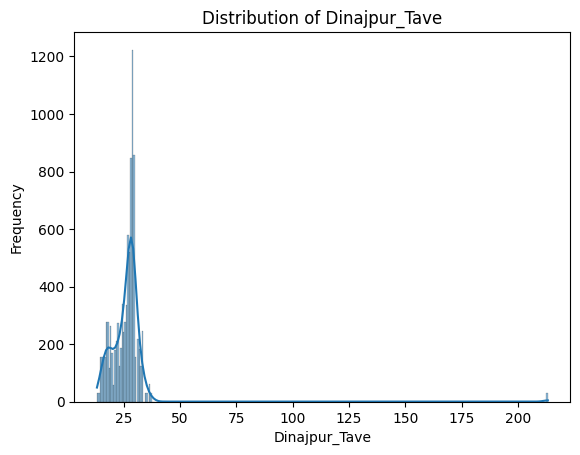

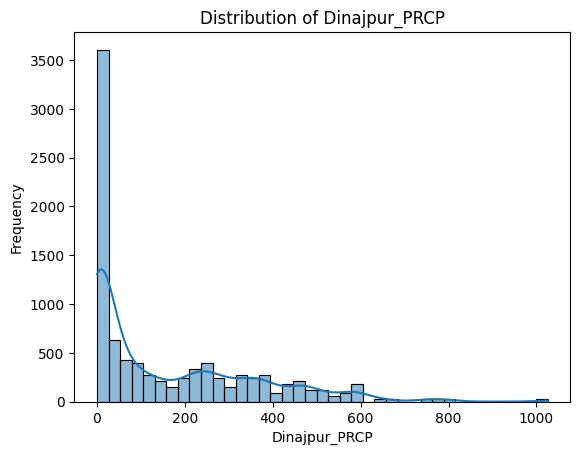

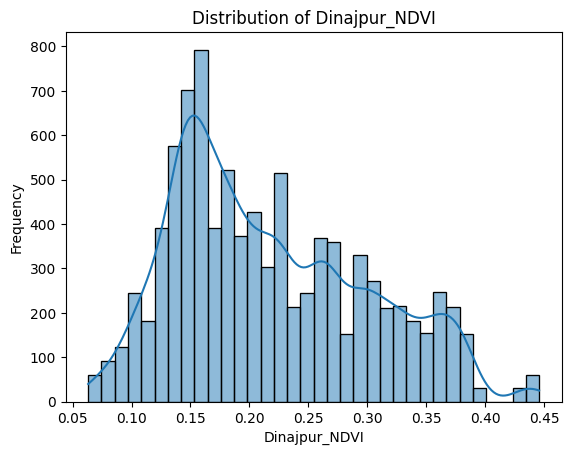

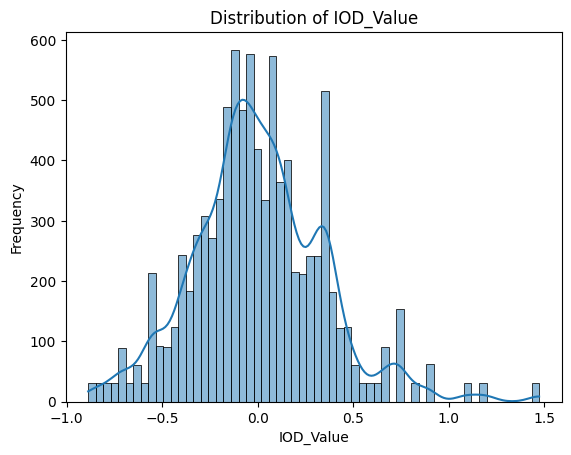

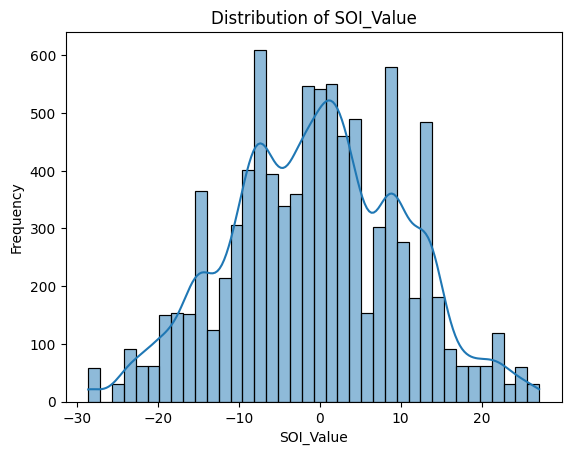

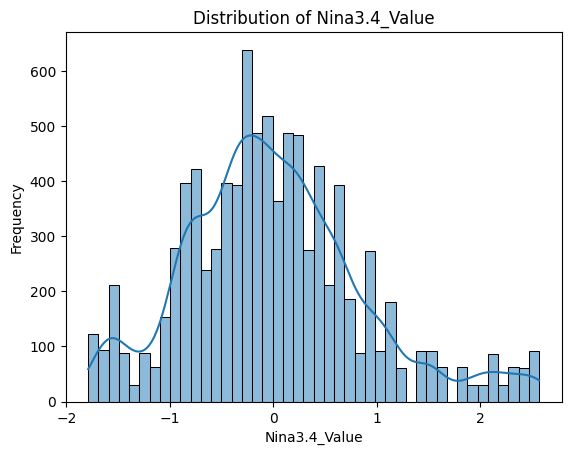

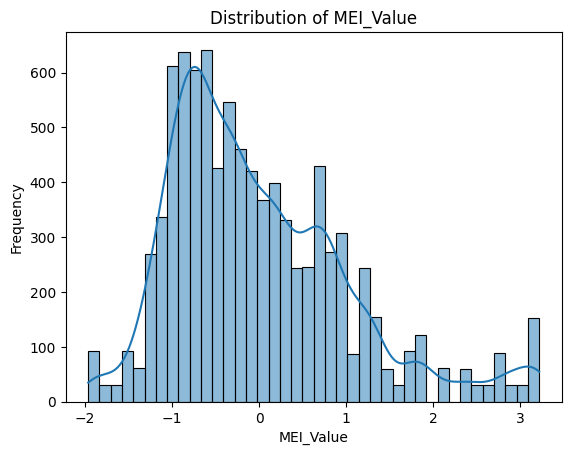

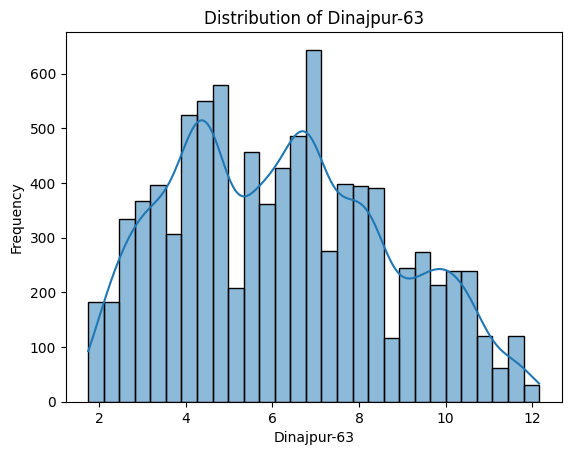

In [8]:
def plot_distribution(df, columns):
    for column in columns:
        if column != 'Date':  
            sns.histplot(df[column], kde=True)
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)  
            plt.ylabel("Frequency")  
            plt.show()


numerical_cols = df.columns[1:]  

plot_distribution(df, numerical_cols)

## Data Cleaning,Checking errors, Missing values

In [9]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(df)

# Called the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [10]:
checker.check_missing_values()

No missing values found in DataFrame


## Outlier detection(Normality test)

In [11]:
def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers

In [12]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  # Calculate the number of rows needed
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten()  # Flatten the axis array to iterate over it
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()
        
        # Remove any unused subplots
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')

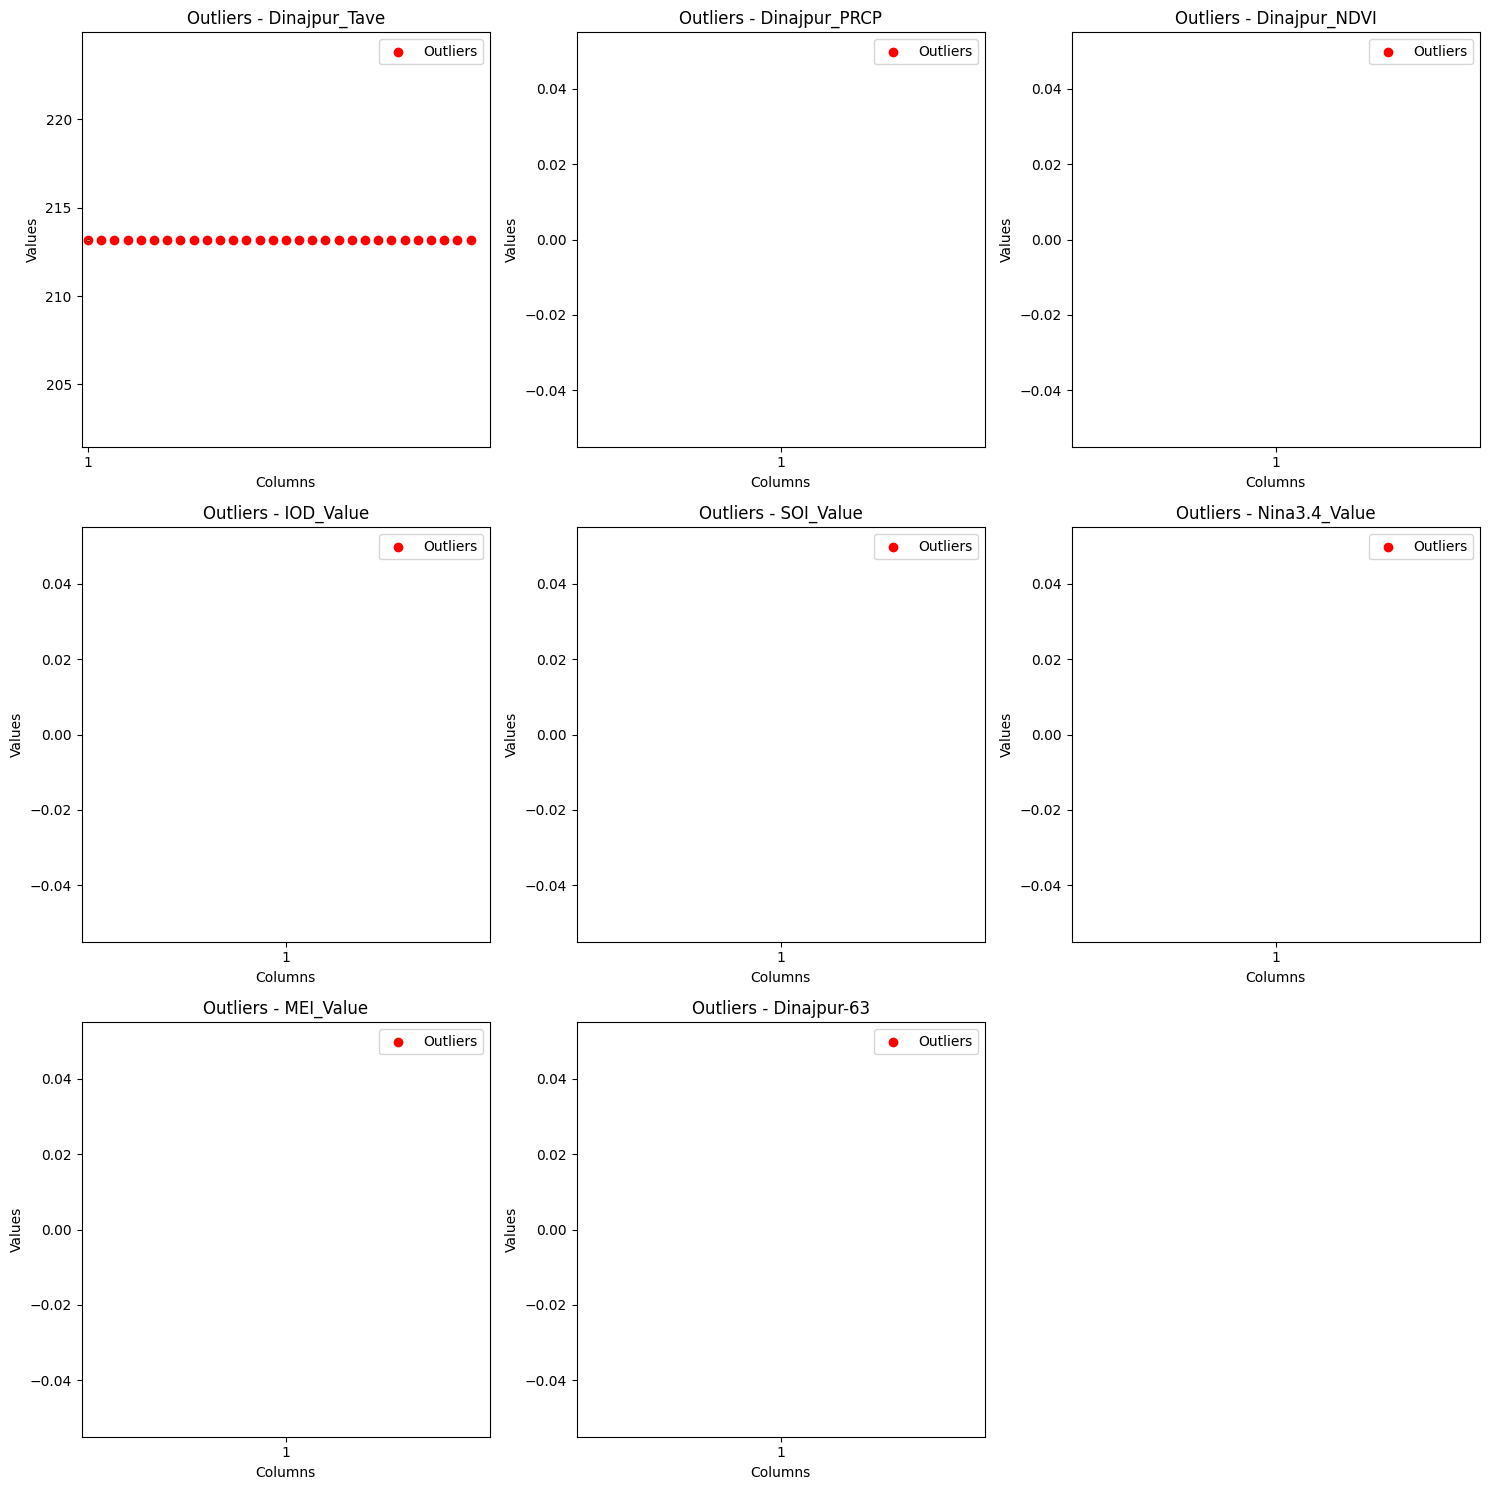

Number of total outliers: 1004


In [13]:
# Detect outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualize outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

## Data Splitting for Machine Learning

In [14]:
X = df.drop(columns=['Dinajpur-63', 'Date'])
y = df['Dinajpur-63']

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Split viz

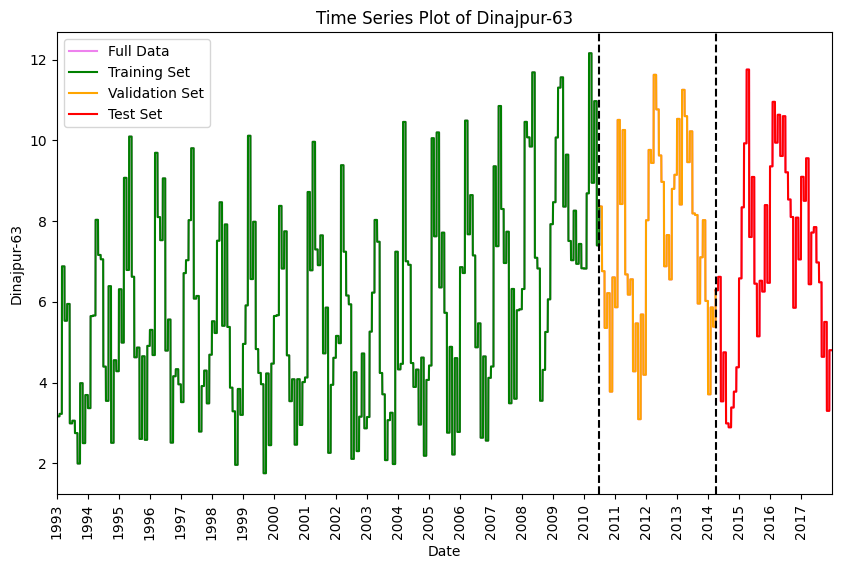

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a time series plot
plt.figure(figsize=(10, 6))

# Plot the entire dataset
plt.plot(df['Date'], df['Dinajpur-63'], color='violet', label='Full Data')

# Plot training data
plt.plot(df['Date'][:len(X_train)], df['Dinajpur-63'][:len(X_train)], color='green', label='Training Set')

# Plot validation data
plt.plot(df['Date'][len(X_train):len(X_train) + len(X_val)], df['Dinajpur-63'][len(X_train):len(X_train) + len(X_val)], color='orange', label='Validation Set')

# Plot test data
plt.plot(df['Date'][len(X_train) + len(X_val):], df['Dinajpur-63'][len(X_train) + len(X_val):], color='red', label='Test Set')

# Add vertical lines
plt.axvline(df['Date'][len(X_train)], color='black', linestyle='--')
plt.axvline(df['Date'][len(X_train) + len(X_val)], color='black', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Dinajpur-63')
plt.title('Time Series Plot of Dinajpur-63')
plt.grid(True, linestyle='--', alpha=0.6)

# Set the date tick frequency to display every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Set the x-axis limits to show data from the first date to the last date
plt.xlim(df['Date'].min(), df['Date'].max())
plt.xticks(rotation=90) 
plt.grid(False)
plt.legend()
plt.show()

In [16]:
X

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
0,14.8,42.0,0.1638,-0.025962,-8.2,0.28,0.925
1,14.8,42.0,0.1638,-0.025962,-8.2,0.28,0.925
2,14.8,42.0,0.1638,-0.025962,-8.2,0.28,0.925
3,14.8,42.0,0.1638,-0.025962,-8.2,0.28,0.925
4,14.8,42.0,0.1638,-0.025962,-8.2,0.28,0.925
...,...,...,...,...,...,...,...
9126,24.6,0.0,0.1329,-0.204937,-1.4,-0.85,-0.404
9127,24.6,0.0,0.1329,-0.204937,-1.4,-0.85,-0.404
9128,24.6,0.0,0.1329,-0.204937,-1.4,-0.85,-0.404
9129,24.6,0.0,0.1329,-0.204937,-1.4,-0.85,-0.404


In [17]:
y

0       3.162
1       3.162
2       3.162
3       3.162
4       3.162
        ...  
9126    4.800
9127    4.800
9128    4.800
9129    4.800
9130    4.800
Name: Dinajpur-63, Length: 9131, dtype: float64

In [18]:
X_train

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
3063,27.7,222.0,0.3292,-0.157832,-9.0,-0.30,-0.322
1940,26.4,148.0,0.1080,-0.131525,-24.4,0.90,2.821
6848,27.4,0.0,0.1967,0.348779,7.3,-0.93,-0.071
3509,28.9,246.0,0.1252,-0.293105,-14.6,0.70,0.636
1612,29.1,501.0,0.1765,0.010510,-24.1,1.15,2.602
...,...,...,...,...,...,...,...
5734,28.7,242.0,0.1999,0.050483,13.5,-0.28,-0.318
5191,23.2,2.0,0.2692,0.147723,-1.4,-0.15,-0.864
5390,26.8,51.0,0.1459,0.130834,5.4,-1.40,-0.669
860,30.3,54.0,0.2495,-0.039353,-9.0,0.03,0.940


In [19]:
X_temp

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
4043,14.8,7.0,0.1418,-0.116838,-11.6,0.26,0.526
3573,26.4,56.0,0.3521,0.626101,-7.4,1.16,1.090
4505,27.1,255.0,0.1897,0.196267,-14.5,0.30,0.588
5381,28.3,234.0,0.1418,0.380060,1.4,-1.04,-0.800
2881,22.6,0.0,0.1011,-0.029802,22.4,-0.75,-0.397
...,...,...,...,...,...,...,...
1489,15.5,21.0,0.2406,-0.058970,4.1,-0.43,-0.453
812,23.8,10.0,0.2367,0.107568,3.5,0.49,0.935
1882,19.6,17.0,0.1146,0.134668,-19.2,2.08,2.823
4974,29.5,126.0,0.1101,0.164956,-15.9,0.37,-0.474


In [20]:
 y_train

3063     7.296667
1940     8.465000
6848     3.092000
3509     4.255000
1612     6.078000
          ...    
5734     4.312500
5191     7.377500
5390     3.597500
860     10.092500
7270     8.796667
Name: Dinajpur-63, Length: 6391, dtype: float64

In [21]:
y_temp


4043    4.3250
3573    3.1525
4505    6.3560
5381    6.3175
2881    2.9480
         ...  
1489    3.5140
812     9.0700
1882    5.2260
4974    5.4650
4039    4.3250
Name: Dinajpur-63, Length: 2740, dtype: float64

In [22]:
X_val

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
7609,21.4,0.0,0.1407,-0.067228,9.2,-0.02,-0.911
4084,25.2,12.0,0.1778,-0.109683,0.2,-0.10,0.118
7920,32.1,424.0,0.1272,-0.465427,-7.6,0.37,-0.523
8327,31.4,0.0,0.3561,0.403764,-20.2,2.21,-0.228
2716,28.9,399.0,0.1538,-0.067885,-5.5,-0.75,-0.711
...,...,...,...,...,...,...,...
5762,26.3,45.0,0.3646,0.102282,13.4,-0.30,-0.012
3254,213.2,53.0,0.1593,-0.082291,7.2,-0.28,-0.290
4541,29.3,474.0,0.1731,0.016435,2.6,0.22,0.737
350,19.0,0.0,0.1413,-0.157270,1.6,0.19,0.784


In [23]:
X_test

,Dinajpur_Tave,Dinajpur_PRCP,Dinajpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
4710,21.7,0.0,0.1467,-0.361621,-2.0,-0.44,-0.998
131,26.8,308.0,0.1435,0.312997,-8.2,0.93,1.860
2802,27.9,196.0,0.1075,0.012307,9.9,-0.39,-0.113
4472,24.4,37.0,0.1239,-0.561639,0.2,0.28,0.631
1108,16.5,16.0,0.2660,0.337663,8.4,-0.65,-0.437
...,...,...,...,...,...,...,...
2948,15.5,0.0,0.2584,0.152971,8.4,-0.88,-0.706
6394,29.6,356.0,0.3326,-0.197084,20.5,-0.89,-1.964
1746,25.5,3.0,0.1809,1.088737,-17.8,2.29,3.214
5820,19.1,0.0,0.4334,-0.102193,13.3,-0.90,-0.540


In [24]:
y_val

7609     8.022000
4084    10.455000
7920     2.890000
8327     6.253333
2716     4.672500
          ...    
5762     5.252000
3254     3.942500
4541     7.712500
350      3.690000
2164     3.198000
Name: Dinajpur-63, Length: 1370, dtype: float64

In [25]:
y_test

4710    4.604000
131     5.946000
2802    2.460000
4472    7.622000
1108    5.303333
          ...   
2948    4.124000
6394    8.360000
1746    4.295000
5820    7.922500
6160    7.432500
Name: Dinajpur-63, Length: 1370, dtype: float64

### Data Split Validation


In [26]:
# Get the indices of the data points in each set
train_indices = X_train.index
val_indices = X_val.index
test_indices = X_test.index

# Check if there's any overlap between the sets
assert len(set(train_indices).intersection(val_indices)) == 0, "Overlap between training and validation sets!"
assert len(set(train_indices).intersection(test_indices)) == 0, "Overlap between training and test sets!"
assert len(set(val_indices).intersection(test_indices)) == 0, "Overlap between validation and test sets!"

# If the code reaches this point, it means there is no overlap
print("No overlap detected. Data splitting is correct.")

No overlap detected. Data splitting is correct.


# Descriptive Statistics(Training,Validation and Testing stage)

In [27]:
# Training Set Descriptive Statistics
train_stats = X_train.describe()
print("Training Set Descriptive Statistics:")
train_stats.T

Training Set Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,6391.0,26.531920,12.933740,13.20000,22.500000,27.400000,29.100000,213.200000
Dinajpur_PRCP,6391.0,165.978251,195.709441,0.00000,3.000000,77.000000,287.000000,1026.000000
Dinajpur_NDVI,6391.0,0.218292,0.082821,0.06320,0.152000,0.201200,0.274000,0.445800
IOD_Value,6391.0,0.001845,0.342237,-0.88667,-0.204923,-0.024343,0.203625,1.472656
SOI_Value,6391.0,-0.442857,10.669366,-28.60000,-7.800000,0.100000,7.700000,27.100000
Nina3.4_Value,6391.0,0.004907,0.865949,-1.79000,-0.565000,-0.070000,0.480000,2.570000
MEI_Value,6391.0,-0.010235,1.037451,-1.96400,-0.774000,-0.228000,0.631000,3.214000


In [28]:
# Validation Set Descriptive Statistics
val_stats = X_val.describe()
print("\nValidation Set Descriptive Statistics:")
val_stats.T


Validation Set Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,1370.0,25.709197,7.157877,13.20000,22.125000,27.00000,29.000000,213.200000
Dinajpur_PRCP,1370.0,153.270803,184.765685,0.00000,3.000000,64.00000,273.000000,1026.000000
Dinajpur_NDVI,1370.0,0.217190,0.080513,0.06320,0.153275,0.19960,0.274000,0.445800
IOD_Value,1370.0,0.003595,0.355028,-0.88667,-0.204923,-0.02345,0.213949,1.472656
SOI_Value,1370.0,-0.599489,10.584601,-28.60000,-8.000000,0.10000,7.300000,27.100000
Nina3.4_Value,1370.0,0.015898,0.864088,-1.79000,-0.545000,-0.07000,0.470000,2.570000
MEI_Value,1370.0,-0.015441,1.004000,-1.96400,-0.730500,-0.25600,0.582000,3.214000


In [29]:
# Testing Set Descriptive Statistics
test_stats = X_test.describe()
print("\nTesting Set Descriptive Statistics:")
test_stats.T


Testing Set Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Dinajpur_Tave,1370.0,25.917664,10.118151,13.20000,22.100000,27.300000,28.900000,213.200000
Dinajpur_PRCP,1370.0,156.685401,191.600047,0.00000,1.000000,55.000000,281.000000,1026.000000
Dinajpur_NDVI,1370.0,0.214213,0.080795,0.06320,0.148500,0.199600,0.267800,0.445800
IOD_Value,1370.0,0.017447,0.347552,-0.88667,-0.178294,0.010084,0.227375,1.472656
SOI_Value,1370.0,-0.607445,11.051441,-28.60000,-7.900000,0.000000,7.700000,27.100000
Nina3.4_Value,1370.0,0.008496,0.900322,-1.79000,-0.570000,-0.090000,0.480000,2.570000
MEI_Value,1370.0,0.024823,1.057025,-1.96400,-0.729000,-0.220000,0.644000,3.214000


# Multicollinearity statistics

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df contains all your conditioning variables (including the target variable)
# df = ...

# Select only the numerical columns (excluding the date column and Dinajpur-63)
numeric_df = df.iloc[:, 2:-1]  # Assuming Dinajpur-63 is the last column

# Calculate VIF for each variable
vif_data = numeric_df.copy()
vif_data['Intercept'] = 1  # Add a constant term for the intercept

# Calculate VIF values
vif_values = pd.Series([variance_inflation_factor(vif_data.values, i) 
                        for i in range(vif_data.shape[1])], 
                       index=vif_data.columns)

# Calculate Tolerance from VIF
tolerance_values = 1 / vif_values

# Display the results
print("VIF Values:")
print(vif_values)

print("\nTolerance Values:")
print(tolerance_values)

VIF Values:
Dinajpur_PRCP    1.021349
Dinajpur_NDVI    1.090597
IOD_Value        1.194382
SOI_Value        2.160887
Nina3.4_Value    2.619188
MEI_Value        1.544756
Intercept        9.464926
dtype: float64

Tolerance Values:
Dinajpur_PRCP    0.979097
Dinajpur_NDVI    0.916929
IOD_Value        0.837253
SOI_Value        0.462773
Nina3.4_Value    0.381798
MEI_Value        0.647351
Intercept        0.105653
dtype: float64


## Modeling

In [31]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ridge': Ridge(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gaussian Process': GaussianProcessRegressor(),
    'Gaussian Process Regressor': GaussianProcessRegressor(random_state=42),
    'Weighted K-Nearest Neighbors': KNeighborsRegressor(weights='distance'),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'XGBoost': XGBRegressor(),
    'LGBM Regressor': lgb.LGBMRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_pred_train = model.predict(X_train)
    
    # Predict on the validation set
    y_pred_val = model.predict(X_val)
    
    # Predict on the test set
    y_pred_test = model.predict(X_test)

    # Calculate metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_rae = mean_absolute_percentage_error(y_train, y_pred_train)
    train_rrse = np.sqrt(np.sum((y_train - y_pred_train)**2) / np.sum((y_train - np.mean(y_train))**2))
    train_cc = np.corrcoef(y_train, y_pred_train)[0, 1]

    # Calculate metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    val_mae = mean_absolute_error(y_val, y_pred_val)
    val_r2 = r2_score(y_val, y_pred_val)
    val_rae = mean_absolute_percentage_error(y_val, y_pred_val)
    val_rrse = np.sqrt(np.sum((y_val - y_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
    val_cc = np.corrcoef(y_val, y_pred_val)[0, 1]
    
    # Calculate metrics for the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rae = mean_absolute_percentage_error(y_test, y_pred_test)
    test_rrse = np.sqrt(np.sum((y_test - y_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
    test_cc = np.corrcoef(y_test, y_pred_test)[0, 1]

    results[name] = {
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train R-squared': train_r2,
        'Train RAE': train_rae,
        'Train RRSE': train_rrse,
        'Train CC': train_cc,        
        'Validation RMSE': val_rmse,
        'Validation MAE': val_mae,
        'Validation R-squared': val_r2,
        'Validation RAE': val_rae,
        'Validation RRSE': val_rrse,
        'Validation CC': val_cc,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test R-squared': test_r2,
        'Test RAE': test_rae,
        'Test RRSE': test_rrse,
        'Test CC': test_cc
    }

# Print the results
for model, metrics in results.items():
    print(f"Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")
    print("\n")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 6.237173
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 6.237173
Metrics for Linear Regression:
Train RMSE: 2.377
Train MAE: 2.008
Train R-squared: 0.066
Train RAE: 0.410
Train RRSE: 0.966
Train CC: 0.257
Validation RMSE: 2.401
Validation MAE: 2.033
Validation R-squared: 0.047
Validation RAE: 0.426
Validation RRSE: 0.976
Validation CC: 0.222
Test RMSE: 2.398
Test MAE: 2.033
Test R-s

In [32]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ridge': Ridge(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gaussian Process': GaussianProcessRegressor(),
    'Gaussian Process Regressor': GaussianProcessRegressor(random_state=42),
    'Weighted K-Nearest Neighbors': KNeighborsRegressor(weights='distance'),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'XGBoost': XGBRegressor(),
    'LGBM Regressor': lgb.LGBMRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Locally Weighted Linear Regression': KNeighborsRegressor(n_neighbors=5, weights='distance')
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_pred_train = model.predict(X_train)
    
    # Predict on the validation set
    y_pred_val = model.predict(X_val)
    
    # Predict on the test set
    y_pred_test = model.predict(X_test)

    # Calculate metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_rae = mean_absolute_percentage_error(y_train, y_pred_train)
    train_rrse = np.sqrt(np.sum((y_train - y_pred_train)**2) / np.sum((y_train - np.mean(y_train))**2))
    train_cc = np.corrcoef(y_train, y_pred_train)[0, 1]

    # Calculate metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    val_mae = mean_absolute_error(y_val, y_pred_val)
    val_r2 = r2_score(y_val, y_pred_val)
    val_rae = mean_absolute_percentage_error(y_val, y_pred_val)
    val_rrse = np.sqrt(np.sum((y_val - y_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
    val_cc = np.corrcoef(y_val, y_pred_val)[0, 1]
    
    # Calculate metrics for the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rae = mean_absolute_percentage_error(y_test, y_pred_test)
    test_rrse = np.sqrt(np.sum((y_test - y_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
    test_cc = np.corrcoef(y_test, y_pred_test)[0, 1]

    results[name] = {
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train R-squared': train_r2,
        'Train RAE': train_rae,
        'Train RRSE': train_rrse,
        'Train CC': train_cc,        
        'Validation RMSE': val_rmse,
        'Validation MAE': val_mae,
        'Validation R-squared': val_r2,
        'Validation RAE': val_rae,
        'Validation RRSE': val_rrse,
        'Validation CC': val_cc,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test R-squared': test_r2,
        'Test RAE': test_rae,
        'Test RRSE': test_rrse,
        'Test CC': test_cc
    }

# Print the results
for model, metrics in results.items():
    print(f"Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:}")
    print("\n")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 6.237173
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1422
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 6.237173
Metrics for Linear Regression:
Train RMSE: 2.376896873057042
Train MAE: 2.008006208684482
Train R-squared: 0.06612045177756642
Train RAE: 0.4099629682269126
Train RRSE: 0.9663744347934881
Train CC: 0.25713897366514965
Validation RMSE: 2.4006386249253056
Validation MAE: 2.0332219952220725
Validation R-squared: 0.0473481

# Hyper parameter tuning

## 1. Random Forest Regressor HPT

In [33]:
# Initialize Random Forest model
random_forest = RandomForestRegressor()

# the hyperparameters and their possible values for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 5, 10],    
    'min_samples_split': [2, 5, 10] 
}

# Initialize Grid Search for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Perform Grid Search for Random Forest
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and model for Random Forest
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Predict on validation set using Random Forest
rf_pred_val = best_rf.predict(X_val)

# Calculate metrics for Random Forest on validation set
rf_rmse_val = np.sqrt(mean_squared_error(y_val, rf_pred_val))
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)
rf_rae_val = mean_absolute_percentage_error(y_val, rf_pred_val)
rf_rrse_val = np.sqrt(np.sum((y_val - rf_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
rf_cc_val = np.corrcoef(y_val, rf_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Random Forest on validation set
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Random Forest RMSE (Validation):", rf_rmse_val)
print("Random Forest MAE (Validation):", rf_mae_val)
print("Random Forest R-squared (Validation):", rf_r2_val)
print("Random Forest RAE (Validation):", rf_rae_val)
print("Random Forest RRSE (Validation):", rf_rrse_val)
print("Random Forest CC (Validation):", rf_cc_val)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest RMSE (Validation): 4.609238790743363e-15
Random Forest MAE (Validation): 3.608954173624578e-15
Random Forest R-squared (Validation): 1.0
Random Forest RAE (Validation): 5.840745748298455e-16
Random Forest RRSE (Validation): 1.873999728990277e-15
Random Forest CC (Validation): 1.0


## 2. LWLR HPT

In [34]:
# the range of neighbors to consider
param_grid_lwlr = {
    'n_neighbors': [3, 5, 7],  # You can adjust these values
    'weights': ['uniform', 'distance']  # You can adjust these values
}

# Initialize LWLR model
lwlr = KNeighborsRegressor()

# Initialize Grid Search for LWLR
grid_search_lwlr = GridSearchCV(lwlr, param_grid_lwlr, scoring='neg_mean_squared_error', cv=5)

# Perform Grid Search for LWLR
grid_search_lwlr.fit(X_train, y_train)

# Get the best hyperparameters and model for LWLR
best_lwlr = grid_search_lwlr.best_estimator_
best_params_lwlr = grid_search_lwlr.best_params_

# Predict on validation set using LWLR
lwlr_pred_val = best_lwlr.predict(X_val)

# Calculate metrics for LWLR on validation set
lwlr_rmse_val = np.sqrt(mean_squared_error(y_val, lwlr_pred_val))
lwlr_mae_val = mean_absolute_error(y_val, lwlr_pred_val)
lwlr_r2_val = r2_score(y_val, lwlr_pred_val)
lwlr_rae_val = mean_absolute_percentage_error(y_val, lwlr_pred_val)
lwlr_rrse_val = np.sqrt(np.sum((y_val - lwlr_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
lwlr_cc_val = np.corrcoef(y_val, lwlr_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for LWLR on validation set
print("Best Hyperparameters for LWLR:", best_params_lwlr)
print("LWLR RMSE (Validation):", lwlr_rmse_val)
print("LWLR MAE (Validation):", lwlr_mae_val)
print("LWLR R-squared (Validation):", lwlr_r2_val)
print("LWLR RAE (Validation):", lwlr_rae_val)
print("LWLR RRSE (Validation):", lwlr_rrse_val)
print("LWLR CC (Validation):", lwlr_cc_val)

Best Hyperparameters for LWLR: {'n_neighbors': 5, 'weights': 'uniform'}
LWLR RMSE (Validation): 2.4153020463696366e-16
LWLR MAE (Validation): 7.795872625470077e-17
LWLR R-squared (Validation): 1.0
LWLR RAE (Validation): 1.4874221335210382e-17
LWLR RRSE (Validation): 9.820006265278303e-17
LWLR CC (Validation): 1.0


## 3. Gaussian Process Regression HPT

In [35]:
# the hyperparameters and their possible values for Gaussian Process Regression
param_grid_gpr = {
    'kernel': [None, 1.0 * RBF(length_scale=1.0), Matern(length_scale=1.0, nu=1.5), WhiteKernel(noise_level=1.0)],   
  
}

# Initialize Grid Search for Gaussian Process Regression
grid_search_gpr = GridSearchCV(GaussianProcessRegressor(), param_grid_gpr, scoring='neg_mean_squared_error', cv=5)
grid_search_gpr.fit(X_train, y_train)

# Get the best hyperparameters and model for Gaussian Process Regression
best_gpr = grid_search_gpr.best_estimator_
best_params_gpr = grid_search_gpr.best_params_

# Predict on validation set using Gaussian Process Regression
gpr_pred_val = best_gpr.predict(X_val)

# Calculate metrics for Gaussian Process Regression on validation set
gpr_rmse_val = np.sqrt(mean_squared_error(y_val, gpr_pred_val))
gpr_mae_val = mean_absolute_error(y_val, gpr_pred_val)
gpr_r2_val = r2_score(y_val, gpr_pred_val)
gpr_rae_val = mean_absolute_percentage_error(y_val, gpr_pred_val)
gpr_rrse_val = np.sqrt(np.sum((y_val - gpr_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
gpr_cc_val = np.corrcoef(y_val, gpr_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Gaussian Process Regression on validation set
print("Best Hyperparameters for Gaussian Process Regression:", best_params_gpr)
print("Gaussian Process RMSE (Validation):", gpr_rmse_val)
print("Gaussian Process MAE (Validation):", gpr_mae_val)
print("Gaussian Process R-squared (Validation):", gpr_r2_val)
print("Gaussian Process RAE (Validation):", gpr_rae_val)
print("Gaussian Process RRSE (Validation):", gpr_rrse_val)
print("Gaussian Process CC (Validation):", gpr_cc_val)   

D:\Jupyter\lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Best Hyperparameters for Gaussian Process Regression: {'kernel': None}
Gaussian Process RMSE (Validation): 3.2621745641545326e-11
Gaussian Process MAE (Validation): 2.955324808879655e-11
Gaussian Process R-squared (Validation): 1.0
Gaussian Process RAE (Validation): 4.7412537410142566e-12
Gaussian Process RRSE (Validation): 1.3263175389007421e-11
Gaussian Process CC (Validation): 0.9999999999999998


## 4. Weighted K-Nearest Neighbors HPT

In [36]:
# the hyperparameters and their possible values for Weighted K-Nearest Neighbors
param_grid_wknn = {
     'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 30, 50], 
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']  
}

# Initialize Grid Search for Weighted K-Nearest Neighbors
grid_search_wknn = GridSearchCV(KNeighborsRegressor(), param_grid_wknn, scoring='neg_mean_squared_error', cv=5)
grid_search_wknn.fit(X_train, y_train)

# Get the best hyperparameters and model for Weighted K-Nearest Neighbors
best_wknn = grid_search_wknn.best_estimator_
best_params_wknn = grid_search_wknn.best_params_

# Predict on validation set using Weighted K-Nearest Neighbors
wknn_pred_val = best_wknn.predict(X_val)

# Calculate metrics for Weighted K-Nearest Neighbors on validation set
wknn_rmse_val = np.sqrt(mean_squared_error(y_val, wknn_pred_val))
wknn_mae_val = mean_absolute_error(y_val, wknn_pred_val)
wknn_r2_val = r2_score(y_val, wknn_pred_val)
wknn_rae_val = mean_absolute_percentage_error(y_val, wknn_pred_val)
wknn_rrse_val = np.sqrt(np.sum((y_val - wknn_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
wknn_cc_val = np.corrcoef(y_val, wknn_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Weighted K-Nearest Neighbors on validation set
print("Best Hyperparameters for Weighted K-Nearest Neighbors:", best_params_wknn)
print("Weighted K-NN RMSE (Validation):", wknn_rmse_val)
print("Weighted K-NN MAE (Validation):", wknn_mae_val)
print("Weighted K-NN R-squared (Validation):", wknn_r2_val)
print("Weighted K-NN RAE (Validation):", wknn_rae_val)
print("Weighted K-NN RRSE (Validation):", wknn_rrse_val)
print("Weighted K-NN CC (Validation):", wknn_cc_val)

Best Hyperparameters for Weighted K-Nearest Neighbors: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Weighted K-NN RMSE (Validation): 1.4755625669398024e-16
Weighted K-NN MAE (Validation): 2.933582006673771e-17
Weighted K-NN R-squared (Validation): 1.0
Weighted K-NN RAE (Validation): 5.272997384456598e-18
Weighted K-NN RRSE (Validation): 5.999263600980466e-17
Weighted K-NN CC (Validation): 1.0


## 5. K-Nearest Neighbors HPT

### The KNeighborsRegressor (KNN) model doesn't have traditional hyperparameters like other models (e.g., Random Forest).However, I performed hyperparameter tuning for the Locally Weighted Linear Regression (LWLR) using Grid Search with a specified range of neighbors and weight options, ultimately finding the best hyperparameters and model for LWLR, and evaluating its performance on the validation set and test set.

In [37]:
# the range of neighbors and weights to consider
param_grid = {
     'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 30, 50], 
    'p': [1, 2],  
    'metric': ['euclidean', 'manhattan'] 
}

# Initialize KNN model
knn = KNeighborsRegressor()

# Initialize Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the KNN model with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn.fit(X_train, y_train)

# Predict on validation set
knn_pred = best_knn.predict(X_val)

# Calculate metrics for KNN
knn_rmse = np.sqrt(mean_squared_error(y_val, knn_pred))
knn_mae = mean_absolute_error(y_val, knn_pred)
knn_r2 = r2_score(y_val, knn_pred)
knn_rae = mean_absolute_percentage_error(y_val, knn_pred)
knn_rrse = np.sqrt(np.sum((y_val - knn_pred)**2) / np.sum((y_val - np.mean(y_val))**2))
knn_cc = np.corrcoef(y_val, knn_pred)[0, 1]

# Print the best hyperparameters and evaluation metrics for KNN
print("Best Hyperparameters for KNN:", best_params)
print("KNN RMSE:", knn_rmse)
print("KNN MAE:", knn_mae)
print("KNN R-squared:", knn_r2)
print("KNN RAE:", knn_rae)
print("KNN RRSE:", knn_rrse)
print("KNN CC:", knn_cc)

Best Hyperparameters for KNN: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
KNN RMSE: 1.4755625669398024e-16
KNN MAE: 2.933582006673771e-17
KNN R-squared: 1.0
KNN RAE: 5.272997384456598e-18
KNN RRSE: 5.999263600980466e-17
KNN CC: 1.0


## 6. XGBoost Regressor HPT

In [38]:
# Define the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform'),
    'gamma': Real(0, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for XGBoost Regressor
bayes_search_xgb = BayesSearchCV(
    XGBRegressor(),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10, 
    random_state=42,  
    n_jobs=-1,  
    verbose=1, 
    n_points=5, 
    refit=True  
)

# Perform Bayesian Optimization
bayes_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters and model for XGBoost Regressor
best_xgb = bayes_search_xgb.best_estimator_
best_params_xgb = bayes_search_xgb.best_params_

# Predict on validation set using XGBoost Regressor
xgb_pred_val = best_xgb.predict(X_val)

# Calculate metrics for XGBoost Regressor on validation set
xgb_rmse_val = np.sqrt(mean_squared_error(y_val, xgb_pred_val))
xgb_mae_val = mean_absolute_error(y_val, xgb_pred_val)
xgb_r2_val = r2_score(y_val, xgb_pred_val)
xgb_rae_val = mean_absolute_percentage_error(y_val, xgb_pred_val)
xgb_rrse_val = np.sqrt(np.sum((y_val - xgb_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
xgb_cc_val = np.corrcoef(y_val, xgb_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for XGBoost Regressor on validation set
print("Best Hyperparameters for XGBoost Regressor:", best_params_xgb)
print("XGBoost RMSE (Validation):", xgb_rmse_val)
print("XGBoost MAE (Validation):", xgb_mae_val)
print("XGBoost R-squared (Validation):", xgb_r2_val)
print("XGBoost RAE (Validation):", xgb_rae_val)
print("XGBoost RRSE (Validation):", xgb_rrse_val)
print("XGBoost CC (Validation):", xgb_cc_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for XGBoost Regressor: OrderedDict([('gamma', 0.009563585051707605), ('learning_rate', 0.13856447107447098), ('max_depth', 5), ('n_estimators', 162)])
XGBoost RMSE (Validation): 0.07579272774429235
XGBoost MAE (Validation): 0.05407777132810633
XGBoost R-squared (Validation): 0.9990504109327027
XGBoost RAE (Validation): 0.01096341639333598
XGBoost RRSE (Validation): 0.030815403085100463
XGBoost CC (Validation): 0.9996536810436774


## 7. CatBoost Regressor  HPT

In [39]:

# Define the search space for hyperparameters
param_dist = {
    'iterations': Integer(100, 300),
    'depth': Integer(4, 8),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for CatBoost Regressor
bayes_search_catboost = BayesSearchCV(
    CatBoostRegressor(verbose=0),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,
    random_state=42,  
    n_jobs=-1, 
    verbose=1,  
    n_points=5,
    refit=True  
)

# Perform Bayesian Optimization
bayes_search_catboost.fit(X_train, y_train)

# Get the best hyperparameters and model for CatBoost Regressor
best_catboost = bayes_search_catboost.best_estimator_
best_params_catboost = bayes_search_catboost.best_params_

# Predict on validation set using CatBoost Regressor
catboost_pred_val = best_catboost.predict(X_val)

# Calculate metrics for CatBoost Regressor on validation set
catboost_rmse_val = np.sqrt(mean_squared_error(y_val, catboost_pred_val))
catboost_mae_val = mean_absolute_error(y_val, catboost_pred_val)
catboost_r2_val = r2_score(y_val, catboost_pred_val)
catboost_rae_val = mean_absolute_percentage_error(y_val, catboost_pred_val)
catboost_rrse_val = np.sqrt(np.sum((y_val - catboost_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
catboost_cc_val = np.corrcoef(y_val, catboost_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for CatBoost Regressor on validation set
print("Best Hyperparameters for CatBoost Regressor:", best_params_catboost)
print("CatBoost RMSE (Validation):", catboost_rmse_val)
print("CatBoost MAE (Validation):", catboost_mae_val)
print("CatBoost R-squared (Validation):", catboost_r2_val)
print("CatBoost RAE (Validation):", catboost_rae_val)
print("CatBoost RRSE (Validation):", catboost_rrse_val)
print("CatBoost CC (Validation):", catboost_cc_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for CatBoost Regressor: OrderedDict([('depth', 8), ('iterations', 226), ('learning_rate', 0.19853585997384401)])
CatBoost RMSE (Validation): 0.001471506553619581
CatBoost MAE (Validation): 0.0010966551376513827
CatBoost R-squared (Validation): 0.9999996420642868
CatBoost RAE (Validation): 0.00021658442752140497
CatBoost RRSE (Validation): 0.0005982772878308122
CatBoost CC (Validation): 0.9999998526700128


## 8. LightGBM Regressor HPT

In [40]:
# Define the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for LightGBM Regressor
bayes_search_lgb = BayesSearchCV(
    LGBMRegressor(verbosity=-1), 
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42, 
    n_jobs=-1,  
    verbose=1, 
    n_points=5,  
    refit=True 
)

# Perform Bayesian Optimization
bayes_search_lgb.fit(X_train, y_train)

# Get the best hyperparameters and model for LightGBM Regressor
best_lgb = bayes_search_lgb.best_estimator_
best_params_lgb = bayes_search_lgb.best_params_

# Predict on validation set using LightGBM Regressor
lgb_pred_val = best_lgb.predict(X_val)

# Calculate metrics for LightGBM Regressor on validation set
lgb_rmse_val = np.sqrt(mean_squared_error(y_val, lgb_pred_val))
lgb_mae_val = mean_absolute_error(y_val, lgb_pred_val)
lgb_r2_val = r2_score(y_val, lgb_pred_val)
lgb_rae_val = mean_absolute_percentage_error(y_val, lgb_pred_val)
lgb_rrse_val = np.sqrt(np.sum((y_val - lgb_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
lgb_cc_val = np.corrcoef(y_val, lgb_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for LightGBM Regressor on validation set
print("Best Hyperparameters for LightGBM Regressor:", best_params_lgb)
print("LightGBM RMSE (Validation):", lgb_rmse_val)
print("LightGBM MAE (Validation):", lgb_mae_val)
print("LightGBM R-squared (Validation):", lgb_r2_val)
print("LightGBM RAE (Validation):", lgb_rae_val)
print("LightGBM RRSE (Validation):", lgb_rrse_val)
print("LightGBM CC (Validation):", lgb_cc_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for LightGBM Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])
LightGBM RMSE (Validation): 0.015343421720006403
LightGBM MAE (Validation): 0.010350329379455321
LightGBM R-squared (Validation): 0.9999610842795467
LightGBM RAE (Validation): 0.00200021371638796
LightGBM RRSE (Validation): 0.006238246584841887
LightGBM CC (Validation): 0.9999833679684844


## 9. Gradient Boosting Regressor HPT

In [41]:
# Define the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for Gradient Boosting Regressor
bayes_search_gbr = BayesSearchCV(
    GradientBoostingRegressor(random_state=42),  
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42,
    n_jobs=-1, 
    verbose=1, 
    n_points=5,  
    refit=True  
)

# Perform Bayesian Optimization
bayes_search_gbr.fit(X_train, y_train)

# Get the best hyperparameters and model for Gradient Boosting Regressor
best_gbr = bayes_search_gbr.best_estimator_
best_params_gbr = bayes_search_gbr.best_params_

# Predict on validation set using Gradient Boosting Regressor
gbr_pred_val = best_gbr.predict(X_val)

# Calculate metrics for Gradient Boosting Regressor on validation set
gbr_rmse_val = np.sqrt(mean_squared_error(y_val, gbr_pred_val))
gbr_mae_val = mean_absolute_error(y_val, gbr_pred_val)
gbr_r2_val = r2_score(y_val, gbr_pred_val)
gbr_rae_val = mean_absolute_percentage_error(y_val, gbr_pred_val)
gbr_rrse_val = np.sqrt(np.sum((y_val - gbr_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
gbr_cc_val = np.corrcoef(y_val, gbr_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Gradient Boosting Regressor on validation set
print("Best Hyperparameters for Gradient Boosting Regressor:", best_params_gbr)
print("Gradient Boosting RMSE (Validation):", gbr_rmse_val)
print("Gradient Boosting MAE (Validation):", gbr_mae_val)
print("Gradient Boosting R-squared (Validation):", gbr_r2_val)
print("Gradient Boosting RAE (Validation):", gbr_rae_val)
print("Gradient Boosting RRSE (Validation):", gbr_rrse_val)
print("Gradient Boosting CC (Validation):", gbr_cc_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Gradient Boosting Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])
Gradient Boosting RMSE (Validation): 0.014711666060860112
Gradient Boosting MAE (Validation): 0.01138539941050638
Gradient Boosting R-squared (Validation): 0.9999642229648423
Gradient Boosting RAE (Validation): 0.0022456593891485807
Gradient Boosting RRSE (Validation): 0.005981390737753677
Gradient Boosting CC (Validation): 0.9999862622087105


## 10.Ridge Regression HPT

In [42]:
# Define the hyperparameters and their possible values for Ridge Regression
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']} 

# Initialize Ridge model
ridge = Ridge(max_iter=10000)

# Initialize Grid Search
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters and model for Ridge Regression
best_ridge = grid_search_ridge.best_estimator_

# Predict on validation set using Ridge Regression
ridge_pred_val = best_ridge.predict(X_val)

# Calculate metrics for Ridge Regression
ridge_rmse_val = np.sqrt(mean_squared_error(y_val, ridge_pred_val))
ridge_mae_val = mean_absolute_error(y_val, ridge_pred_val)
ridge_r2_val = r2_score(y_val, ridge_pred_val)
ridge_rae_val = mean_absolute_percentage_error(y_val, ridge_pred_val)
ridge_rrse_val = np.sqrt(np.sum((y_val - ridge_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
ridge_cc_val = np.corrcoef(y_val, ridge_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Ridge Regression
print("Best Hyperparameters for Ridge Regression:", grid_search_ridge.best_params_)
print("Ridge Regression RMSE (Validation):", ridge_rmse_val)
print("Ridge Regression MAE (Validation):", ridge_mae_val)
print("Ridge Regression R-squared (Validation):", ridge_r2_val)
print("Ridge Regression RAE (Validation):", ridge_rae_val)
print("Ridge Regression RRSE (Validation):", ridge_rrse_val)
print("Ridge Regression CC (Validation):", ridge_cc_val)

Best Hyperparameters for Ridge Regression: {'alpha': 10, 'solver': 'auto'}
Ridge Regression RMSE (Validation): 2.4001900515481633
Ridge Regression MAE (Validation): 2.0331745501693175
Ridge Regression R-squared (Validation): 0.04770414555349656
Ridge Regression RAE (Validation): 0.42587494329192244
Ridge Regression RRSE (Validation): 0.975856472257321
Ridge Regression CC (Validation): 0.22301016774395913


# Hybrid models

## Hybrid modeling

## Hybrid model 1: Validation

In [43]:
hybrid1_pred_val = (rf_pred_val + lwlr_pred_val) / 2

# Evaluate the performance of Hybrid Model 1
hybrid1_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid1_pred_val))
hybrid1_mae_val = mean_absolute_error(y_val, hybrid1_pred_val)
hybrid1_r2_val = r2_score(y_val, hybrid1_pred_val)
hybrid1_rae_val = mean_absolute_percentage_error(y_val, hybrid1_pred_val)
hybrid1_rrse_val = np.sqrt(np.sum((y_val - hybrid1_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid1_cc_val = np.corrcoef(y_val, hybrid1_pred_val)[0, 1]

print("Hybrid Model 1 (Random Forest + LWLR) RMSE (Validation):", hybrid1_rmse_val)
print("Hybrid Model 1 (Random Forest + LWLR) MAE (Validation):", hybrid1_mae_val)
print("Hybrid Model 1 (Random Forest + LWLR) R-squared (Validation):", hybrid1_r2_val)
print("Hybrid Model 1 (Random Forest + LWLR) RAE (Validation):", hybrid1_rae_val)
print("Hybrid Model 1 (Random Forest + LWLR) RRSE (Validation):", hybrid1_rrse_val)
print("Hybrid Model 1 (Random Forest + LWLR) CC (Validation):", hybrid1_cc_val)

Hybrid Model 1 (Random Forest + LWLR) RMSE (Validation): 2.33073889400554e-15
Hybrid Model 1 (Random Forest + LWLR) MAE (Validation): 1.8175242333060593e-15
Hybrid Model 1 (Random Forest + LWLR) R-squared (Validation): 1.0
Hybrid Model 1 (Random Forest + LWLR) RAE (Validation): 2.9392688013574195e-16
Hybrid Model 1 (Random Forest + LWLR) RRSE (Validation): 9.476193909686888e-16
Hybrid Model 1 (Random Forest + LWLR) CC (Validation): 1.0


## Hybrid model 1: Test

In [44]:
# Predict on the test set using Random Forest Regressor
rf_pred_test = best_rf.predict(X_test)

# Predict on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)


hybrid1_pred_test = (rf_pred_test + lwlr_pred_test) / 2

# Calculate metrics for the hybrid model on test set
hybrid1_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid1_pred_test))
hybrid1_mae_test = mean_absolute_error(y_test, hybrid1_pred_test)
hybrid1_r2_test = r2_score(y_test, hybrid1_pred_test)
hybrid1_rae_test = mean_absolute_percentage_error(y_test, hybrid1_pred_test)
hybrid1_rrse_test = np.sqrt(np.sum((y_test - hybrid1_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid1_cc_test = np.corrcoef(y_test, hybrid1_pred_test)[0, 1]

# Print evaluation metrics for Hybrid Model 1
print("Hybrid Model 1 (Random Forest + LWLR) RMSE (Test):", hybrid1_rmse_test)
print("Hybrid Model 1 (Random Forest + LWLR) MAE (Test):", hybrid1_mae_test)
print("Hybrid Model 1 (Random Forest + LWLR) R-squared (Test):", hybrid1_r2_test)
print("Hybrid Model 1 (Random Forest + LWLR) RAE (Test):", hybrid1_rae_test)
print("Hybrid Model 1 (Random Forest + LWLR) RRSE (Test):", hybrid1_rrse_test)
print("Hybrid Model 1 (Random Forest + LWLR) CC (Test):", hybrid1_cc_test)

Hybrid Model 1 (Random Forest + LWLR) RMSE (Test): 2.401135228584624e-15
Hybrid Model 1 (Random Forest + LWLR) MAE (Test): 1.8713335828207383e-15
Hybrid Model 1 (Random Forest + LWLR) R-squared (Test): 1.0
Hybrid Model 1 (Random Forest + LWLR) RAE (Test): 2.979452074095595e-16
Hybrid Model 1 (Random Forest + LWLR) RRSE (Test): 9.72671022985906e-16
Hybrid Model 1 (Random Forest + LWLR) CC (Test): 0.9999999999999998


## Hybrid model 2: Validation

In [45]:
# Calculate predictions for Hybrid Model 2 (GBR + CatBoost) on validation set
hybrid2_pred_val = (best_lgb.predict(X_val) + best_catboost.predict(X_val)) / 2

# Evaluate the performance of Hybrid Model 2
hybrid2_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid2_pred_val))
hybrid2_mae_val = mean_absolute_error(y_val, hybrid2_pred_val)
hybrid2_r2_val = r2_score(y_val, hybrid2_pred_val)
hybrid2_rae_val = mean_absolute_percentage_error(y_val, hybrid2_pred_val)
hybrid2_rrse_val = np.sqrt(np.sum((y_val - np.mean(y_val))**2) / np.sum((y_val - hybrid2_pred_val)**2))
hybrid2_cc_val = np.corrcoef(y_val, hybrid2_pred_val)[0, 1]

# Print evaluation metrics for Hybrid Model 2
print("Hybrid Model 2 (GBR + CatBoost) RMSE (Validation):", hybrid2_rmse_val)
print("Hybrid Model 2 (GBR + CatBoost) MAE (Validation):", hybrid2_mae_val)
print("Hybrid Model 2 (GBR + CatBoost) R-squared (Validation):", hybrid2_r2_val)
print("Hybrid Model 2 (GBR + CatBoost) RAE (Validation):", hybrid2_rae_val)
print("Hybrid Model 2 (GBR + CatBoost) RRSE (Validation):", hybrid2_rrse_val)
print("Hybrid Model 2 (GBR + CatBoost) CC (Validation):", hybrid2_cc_val)

Hybrid Model 2 (GBR + CatBoost) RMSE (Validation): 0.008183245234028864
Hybrid Model 2 (GBR + CatBoost) MAE (Validation): 0.005529294418490895
Hybrid Model 2 (GBR + CatBoost) R-squared (Validation): 0.9999889304041895
Hybrid Model 2 (GBR + CatBoost) RAE (Validation): 0.0010729490318927657
Hybrid Model 2 (GBR + CatBoost) RRSE (Validation): 300.56203202126426
Hybrid Model 2 (GBR + CatBoost) CC (Validation): 0.9999953388743884


## Hybrid model 2: Test

In [46]:
# Predict on the test set using Gradient Boosting Regressor
gbr_pred_test = best_lgb.predict(X_test)

# Predict on the test set using CatBoost Regressor
catboost_pred_test = best_catboost.predict(X_test)


hybrid2_pred_test = (gbr_pred_test + catboost_pred_test) / 2

# Evaluate the performance of Hybrid Model 2 on the test set
hybrid2_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid2_pred_test))
hybrid2_mae_test = mean_absolute_error(y_test, hybrid2_pred_test)
hybrid2_r2_test = r2_score(y_test, hybrid2_pred_test)
hybrid2_rae_test = mean_absolute_percentage_error(y_test, hybrid2_pred_test)
hybrid2_rrse_test = np.sqrt(np.sum((y_test - hybrid2_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid2_cc_test = np.corrcoef(y_test, hybrid2_pred_test)[0, 1]

print("Hybrid Model 2 (GBR + CatBoost) RMSE (Test):", hybrid2_rmse_test)
print("Hybrid Model 2 (GBR + CatBoost) MAE (Test):", hybrid2_mae_test)
print("Hybrid Model 2 (GBR + CatBoost) R-squared (Test):", hybrid2_r2_test)
print("Hybrid Model 2 (GBR + CatBoost) RAE (Test):", hybrid2_rae_test)
print("Hybrid Model 2 (GBR + CatBoost) RRSE (Test):", hybrid2_rrse_test)
print("Hybrid Model 2 (GBR + CatBoost) CC (Test):", hybrid2_cc_test)

Hybrid Model 2 (GBR + CatBoost) RMSE (Test): 0.00834634024471831
Hybrid Model 2 (GBR + CatBoost) MAE (Test): 0.005516581687230522
Hybrid Model 2 (GBR + CatBoost) R-squared (Test): 0.9999885688246483
Hybrid Model 2 (GBR + CatBoost) RAE (Test): 0.0010512677038745624
Hybrid Model 2 (GBR + CatBoost) RRSE (Test): 0.0033810021224019043
Hybrid Model 2 (GBR + CatBoost) CC (Test): 0.9999953796499256


## Hybrid model 3: Validation

In [47]:
hybrid3_pred_val = (ridge_pred_val + lwlr_pred_val) / 2

# Calculate metrics for the hybrid model on validation set
hybrid3_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid3_pred_val))
hybrid3_mae_val = mean_absolute_error(y_val, hybrid3_pred_val)
hybrid3_r2_val = r2_score(y_val, hybrid3_pred_val)
hybrid3_rae_val = mean_absolute_percentage_error(y_val, hybrid3_pred_val)
hybrid3_rrse_val = np.sqrt(np.sum((y_val - hybrid3_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid3_cc_val = np.corrcoef(y_val, hybrid3_pred_val)[0, 1]

print("Hybrid Model 3 (Ridge + LWLR) RMSE (Validation):", hybrid3_rmse_val)
print("Hybrid Model 3 (Ridge + LWLR) MAE (Validation):", hybrid3_mae_val)
print("Hybrid Model 3 (Ridge + LWLR) R-squared (Validation):", hybrid3_r2_val)
print("Hybrid Model 3 (Ridge + LWLR) RAE (Validation):", hybrid3_rae_val)
print("Hybrid Model 3 (Ridge + LWLR) RRSE (Validation):", hybrid3_rrse_val)
print("Hybrid Model 3 (Ridge + LWLR) CC (Validation):", hybrid3_cc_val)

Hybrid Model 3 (Ridge + LWLR) RMSE (Validation): 1.2000950257740817
Hybrid Model 3 (Ridge + LWLR) MAE (Validation): 1.0165872750846587
Hybrid Model 3 (Ridge + LWLR) R-squared (Validation): 0.7619260363883742
Hybrid Model 3 (Ridge + LWLR) RAE (Validation): 0.21293747164596122
Hybrid Model 3 (Ridge + LWLR) RRSE (Validation): 0.4879282361286605
Hybrid Model 3 (Ridge + LWLR) CC (Validation): 0.9762773394397394


## Hybrid model 3: Test

In [48]:
# Predict on the test set using Ridge Regression
ridge_pred_test = best_ridge.predict(X_test)

# Predict on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)

hybrid3_pred_test = (ridge_pred_test + lwlr_pred_test) / 2

# Calculate metrics for the hybrid model 3 on test set
hybrid3_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid3_pred_test))
hybrid3_mae_test = mean_absolute_error(y_test, hybrid3_pred_test)
hybrid3_r2_test = r2_score(y_test, hybrid3_pred_test)
hybrid3_rae_test = mean_absolute_percentage_error(y_test, hybrid3_pred_test)
hybrid3_rrse_test = np.sqrt(np.sum((y_test - hybrid3_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid3_cc_test = np.corrcoef(y_test, hybrid3_pred_test)[0, 1]

# Print evaluation metrics for Hybrid Model 3
print("Hybrid Model 3 (Ridge + LWLR) RMSE (Test):", hybrid3_rmse_test)
print("Hybrid Model 3 (Ridge + LWLR) MAE (Test):", hybrid3_mae_test)
print("Hybrid Model 3 (Ridge + LWLR) R-squared (Test):", hybrid3_r2_test)
print("Hybrid Model 3 (Ridge + LWLR) RAE (Test):", hybrid3_rae_test)
print("Hybrid Model 3 (Ridge + LWLR) RRSE (Test):", hybrid3_rrse_test)
print("Hybrid Model 3 (Ridge + LWLR) CC (Test):", hybrid3_cc_test)

Hybrid Model 3 (Ridge + LWLR) RMSE (Test): 1.1987617834990416
Hybrid Model 3 (Ridge + LWLR) MAE (Test): 1.0167650345988473
Hybrid Model 3 (Ridge + LWLR) R-squared (Test): 0.764188763786932
Hybrid Model 3 (Ridge + LWLR) RAE (Test): 0.20716404133329255
Hybrid Model 3 (Ridge + LWLR) RRSE (Test): 0.4856039911420292
Hybrid Model 3 (Ridge + LWLR) CC (Test): 0.974415132067837


## Hybrid model 4: Validation

In [49]:
# Define weights for models
weight_rf = 0.4
weight_lgb = 0.3
weight_catboost = 0.3

# Combine predictions
hybrid4_pred_val = (weight_rf * rf_pred_val + weight_lgb * lgb_pred_val + weight_catboost * catboost_pred_val)

# Evaluate the performance of Hybrid Model 4
hybrid4_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid4_pred_val))
hybrid4_mae_val = mean_absolute_error(y_val, hybrid4_pred_val)
hybrid4_r2_val = r2_score(y_val, hybrid4_pred_val)
hybrid4_rae_val = mean_absolute_percentage_error(y_val, hybrid4_pred_val)
hybrid4_rrse_val = np.sqrt(np.sum((y_val - hybrid4_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid4_cc_val = np.corrcoef(y_val, hybrid4_pred_val)[0, 1]

print("Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Validation):", hybrid4_rmse_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Validation):", hybrid4_mae_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Validation):", hybrid4_r2_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Validation):", hybrid4_rae_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RRSE (Validation):", hybrid4_rrse_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Validation):", hybrid4_cc_val)

Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Validation): 0.004909947140417375
Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Validation): 0.003317576651094491
Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Validation): 0.9999960149455082
Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Validation): 0.0006437694191356367
Hybrid Model 4 (RF + LightGBM + CatBoost) RRSE (Validation): 0.0019962601262875344
Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Validation): 0.9999983237740736


## Hybrid model 4: Test

In [50]:
# Define weights for models
weight_rf = 0.4
weight_lgb = 0.3
weight_catboost = 0.3


rf_pred_test = best_rf.predict(X_test)  
lgb_pred_test = best_lgb.predict(X_test) 
catboost_pred_test = best_catboost.predict(X_test)

# Combine predictions for the test set
hybrid4_pred_test = (weight_rf * rf_pred_test + weight_lgb * lgb_pred_test + weight_catboost * catboost_pred_test)

# Evaluate the performance of Hybrid Model 4 on the test set
hybrid4_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid4_pred_test))
hybrid4_mae_test = mean_absolute_error(y_test, hybrid4_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid4_pred_test)
hybrid4_rae_test = mean_absolute_percentage_error(y_test, hybrid4_pred_test)
hybrid4_rrse_test = np.sqrt(np.sum((y_test - hybrid4_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid4_cc_test = np.corrcoef(y_test, hybrid4_pred_test)[0, 1]

print("Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Test):", hybrid4_r2_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Test):", hybrid4_rae_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RRSE (Test):", hybrid4_rrse_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Test):", hybrid4_cc_test)

Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Test): 0.00500780414683101
Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Test): 0.003309949012338273
Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Test): 0.9999958847768734
Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Test): 0.0006307606223247147
Hybrid Model 4 (RF + LightGBM + CatBoost) RRSE (Test): 0.002028601273441152
Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Test): 0.9999983386434678


## Hybrid model 5: Validation

In [51]:
hybrid5_pred_val = (rf_pred_val + gpr_pred_val + lgb_pred_val) / 3

# Calculate metrics for the hybrid model 5 on validation set
hybrid5_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid5_pred_val))
hybrid5_mae_val = mean_absolute_error(y_val, hybrid5_pred_val)
hybrid5_r2_val = r2_score(y_val, hybrid5_pred_val)
hybrid5_rae_val = mean_absolute_percentage_error(y_val, hybrid5_pred_val)
hybrid5_rrse_val = np.sqrt(np.sum((y_val - hybrid5_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid5_cc_val = np.corrcoef(y_val, hybrid5_pred_val)[0, 1]

print("Hybrid Model 5 (RF + GPR + LightGBM) RMSE:", hybrid5_rmse_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) MAE:", hybrid5_mae_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) R-squared:", hybrid5_r2_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) RAE:", hybrid5_rae_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) RRSE:", hybrid5_rrse_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) CC:", hybrid5_cc_val)

Hybrid Model 5 (RF + GPR + LightGBM) RMSE: 0.00511447390876136
Hybrid Model 5 (RF + GPR + LightGBM) MAE: 0.003450109794024268
Hybrid Model 5 (RF + GPR + LightGBM) R-squared: 0.9999956760310572
Hybrid Model 5 (RF + GPR + LightGBM) RAE: 0.0006667379054282861
Hybrid Model 5 (RF + GPR + LightGBM) RRSE: 0.002079415529131411
Hybrid Model 5 (RF + GPR + LightGBM) CC: 0.9999981578919005


## Hybrid model 5: Test

In [52]:
gpr_pred_test = best_gpr.predict(X_test)

hybrid5_pred_test = (rf_pred_test + gpr_pred_test + lgb_pred_test) / 3

# Calculate metrics for the hybrid model 5 on the test set
hybrid5_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid5_pred_test))
hybrid5_mae_test = mean_absolute_error(y_test, hybrid5_pred_test)
hybrid5_r2_test = r2_score(y_test, hybrid5_pred_test)
hybrid5_rae_test = mean_absolute_percentage_error(y_test, hybrid5_pred_test)
hybrid5_rrse_test = np.sqrt(np.sum((y_test - hybrid5_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid5_cc_test = np.corrcoef(y_test, hybrid5_pred_test)[0, 1]

print("Hybrid Model 5 (RF + GPR + LightGBM) RMSE (Test):", hybrid5_rmse_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) MAE (Test):", hybrid5_mae_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) R-squared (Test):", hybrid5_r2_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) RAE (Test):", hybrid5_rae_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) RRSE (Test):", hybrid5_rrse_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) CC (Test):", hybrid5_cc_test)

Hybrid Model 5 (RF + GPR + LightGBM) RMSE (Test): 0.005225716228825337
Hybrid Model 5 (RF + GPR + LightGBM) MAE (Test): 0.0034434574466044605
Hybrid Model 5 (RF + GPR + LightGBM) R-squared (Test): 0.9999955188409165
Hybrid Model 5 (RF + GPR + LightGBM) RAE (Test): 0.0006537015068067657
Hybrid Model 5 (RF + GPR + LightGBM) RRSE (Test): 0.0021168748388743453
Hybrid Model 5 (RF + GPR + LightGBM) CC (Test): 0.9999981637577036


## Hybrid model 6: Validation

In [53]:
hybrid6_pred_val = (knn_pred + xgb_pred_val + catboost_pred_val) / 3

# Calculate metrics for the hybrid model 6 on validation set
hybrid6_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid6_pred_val))
hybrid6_mae_val = mean_absolute_error(y_val, hybrid6_pred_val)
hybrid6_r2_val = r2_score(y_val, hybrid6_pred_val)
hybrid6_rae_val = mean_absolute_percentage_error(y_val, hybrid6_pred_val)
hybrid6_rrse_val = np.sqrt(np.sum((y_val - hybrid6_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid6_cc_val = np.corrcoef(y_val, hybrid6_pred_val)[0, 1]

print("Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Validation):", hybrid6_rmse_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Validation):", hybrid6_mae_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Validation):", hybrid6_r2_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Validation):", hybrid6_rae_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RRSE (Validation):", hybrid6_rrse_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) CC (Validation):", hybrid6_cc_val)

Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Validation): 0.025618366800735606
Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Validation): 0.018277932568122518
Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Validation): 0.9998915115485502
Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Validation): 0.0037036539231790943
Hybrid Model 6 (KNN + XGB + CatBoost) RRSE (Validation): 0.010415778965100948
Hybrid Model 6 (KNN + XGB + CatBoost) CC (Validation): 0.9999613239712619


## Hybrid model 6: Test

In [54]:
best_knn_pred_test = best_knn.predict(X_test)
best_xgb_pred_test = best_xgb.predict(X_test)
best_catboost_pred_test = best_catboost.predict(X_test)

hybrid6_pred_test = (best_knn_pred_test + best_xgb_pred_test + best_catboost_pred_test) / 3

# Calculate metrics for the hybrid model 6 on test set
hybrid6_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid6_pred_test))
hybrid6_mae_test = mean_absolute_error(y_test, hybrid6_pred_test)
hybrid6_r2_test = r2_score(y_test, hybrid6_pred_test)
hybrid6_rae_test = mean_absolute_percentage_error(y_test, hybrid6_pred_test)
hybrid6_rrse_test = np.sqrt(np.sum((y_test - hybrid6_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid6_cc_test = np.corrcoef(y_test, hybrid6_pred_test)[0, 1]

print("Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Test):", hybrid6_rmse_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Test):", hybrid6_mae_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Test):", hybrid6_r2_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Test):", hybrid6_rae_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RRSE (Test):", hybrid6_rrse_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) CC (Test):", hybrid6_cc_test)

Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Test): 0.025363417685932973
Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Test): 0.017637683477160666
Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Test): 0.9998944363825661
Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Test): 0.0034960847375292304
Hybrid Model 6 (KNN + XGB + CatBoost) RRSE (Test): 0.010274415673596778
Hybrid Model 6 (KNN + XGB + CatBoost) CC (Test): 0.9999639981515376


## Hybrid model 7: Validation

In [55]:
hybrid7_pred_val = (rf_pred_val + lwlr_pred_val + gpr_pred_val + wknn_pred_val) / 4

# Calculate metrics for the hybrid model 7 on validation set
hybrid7_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid7_pred_val))
hybrid7_mae_val = mean_absolute_error(y_val, hybrid7_pred_val)
hybrid7_r2_val = r2_score(y_val, hybrid7_pred_val)
hybrid7_rae_val = mean_absolute_percentage_error(y_val, hybrid7_pred_val)
hybrid7_rrse_val = np.sqrt(np.sum((y_val - hybrid7_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid7_cc_val = np.corrcoef(y_val, hybrid7_pred_val)[0, 1]

print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Validation):", hybrid7_rmse_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Validation):", hybrid7_mae_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Validation):", hybrid7_r2_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Validation):", hybrid7_rae_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RRSE (Validation):", hybrid7_rrse_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Validation):", hybrid7_cc_val)

Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Validation): 8.155464950648754e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Validation): 7.388355782814706e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Validation): 1.0
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Validation): 1.1853265667168785e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RRSE (Validation): 3.3158054509995617e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Validation): 1.0


## Hybrid model 7: Test

In [56]:
# Predict on the test set using Random Forest Regressor
rf_pred_test = best_rf.predict(X_test)

# Predict on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)

# Predict on the test set using Gaussian Process Regressor
gpr_pred_test = best_gpr.predict(X_test)

# Predict on the test set using Weighted k-Nearest Neighbors Regressor
wknn_pred_test = best_wknn.predict(X_test)

hybrid7_pred_test = (rf_pred_test + lwlr_pred_test + gpr_pred_test + wknn_pred_test) / 4

# Calculate metrics for the hybrid model 7 on test set
hybrid7_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid7_pred_test))
hybrid7_mae_test = mean_absolute_error(y_test, hybrid7_pred_test)
hybrid7_r2_test = r2_score(y_test, hybrid7_pred_test)
hybrid7_rae_test = mean_absolute_percentage_error(y_test, hybrid7_pred_test)
hybrid7_rrse_test = np.sqrt(np.sum((y_test - hybrid7_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid7_cc_test = np.corrcoef(y_test, hybrid7_pred_test)[0, 1]

# Print evaluation metrics for Hybrid Model 7
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Test):", hybrid7_rmse_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Test):", hybrid7_mae_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Test):", hybrid7_r2_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Test):", hybrid7_rae_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RRSE (Test):", hybrid7_rrse_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Test):", hybrid7_cc_test)

Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Test): 8.25570708012716e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Test): 7.50252139408592e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Test): 1.0
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Test): 1.1866769957418849e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RRSE (Test): 3.3442877167033586e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Test): 0.9999999999999993


## Hybrid model 8: Validation

In [57]:
hybrid8_pred_val = (xgb_pred_val + catboost_pred_val + lgb_pred_val + ridge_pred_val) / 4

# Calculate metrics for the hybrid model on validation set
hybrid8_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid8_pred_val))
hybrid8_mae_val = mean_absolute_error(y_val, hybrid8_pred_val)
hybrid8_r2_val = r2_score(y_val, hybrid8_pred_val)
hybrid8_rae_val = mean_absolute_percentage_error(y_val, hybrid8_pred_val)
hybrid8_rrse_val = np.sqrt(np.sum((y_val - hybrid8_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid8_cc_val = np.corrcoef(y_val, hybrid8_pred_val)[0, 1]

# Print evaluation metrics for Hybrid Model 8
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RMSE (Validation):", hybrid8_rmse_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) MAE (Validation):", hybrid8_mae_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) R-squared (Validation):", hybrid8_r2_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RAE (Validation):", hybrid8_rae_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RRSE (Validation):", hybrid8_rrse_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) CC (Validation):", hybrid8_cc_val)

Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RMSE (Validation): 0.6125888011102857
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) MAE (Validation): 0.5191860732168662
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) R-squared (Validation): 0.9379675781190411
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RAE (Validation): 0.10873916071486724
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RRSE (Validation): 0.24906308815430456
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) CC (Validation): 0.9968782222442935


## Hybrid model 8: Test

In [58]:
# Predict on the test set using the hybrid model
hybrid8_pred_test = (best_xgb.predict(X_test) + best_catboost.predict(X_test) + best_lgb.predict(X_test) + best_ridge.predict(X_test)) / 4

# Calculate metrics for the hybrid model 8 on the test set
hybrid8_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid8_pred_test))
hybrid8_mae_test = mean_absolute_error(y_test, hybrid8_pred_test)
hybrid8_r2_test = r2_score(y_test, hybrid8_pred_test)
hybrid8_rae_test = mean_absolute_percentage_error(y_test, hybrid8_pred_test)
hybrid8_rrse_test = np.sqrt(np.sum((y_test - hybrid8_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid8_cc_test = np.corrcoef(y_test, hybrid8_pred_test)[0, 1]

# Print evaluation metrics for the hybrid model 8 on the test set
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RMSE (Test):", hybrid8_rmse_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) MAE (Test):", hybrid8_mae_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) R-squared (Test):", hybrid8_r2_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RAE (Test):", hybrid8_rae_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RRSE (Test):", hybrid8_rrse_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) CC (Test):", hybrid8_cc_test)

Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RMSE (Test): 0.6122709905233523
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) MAE (Test): 0.5194636707641794
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) R-squared (Test): 0.9384842840886356
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RAE (Test): 0.10582991844763862
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RRSE (Test): 0.24802361966426592
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) CC (Test): 0.9966454660107765


## Hybrid model 9: Validation

In [59]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Define the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predict on the validation set using the stacking model
hybrid9_pred_val = stacking_model.predict(X_val)

# Calculate metrics for the hybrid model 9 on the validation set
hybrid9_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid9_pred_val))
hybrid9_mae_val = mean_absolute_error(y_val, hybrid9_pred_val)
hybrid9_r2_val = r2_score(y_val, hybrid9_pred_val)
hybrid9_rae_val = mean_absolute_percentage_error(y_val, hybrid9_pred_val)
hybrid9_rrse_val = np.sqrt(np.sum((y_val - hybrid9_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid9_cc_val = np.corrcoef(y_val, hybrid9_pred_val)[0, 1]

print("Hybrid Model 9 RMSE (Validation):", hybrid9_rmse_val)
print("Hybrid Model 9 MAE (Validation):", hybrid9_mae_val)
print("Hybrid Model 9 R-squared (Validation):", hybrid9_r2_val)
print("Hybrid Model 9 RAE (Validation):", hybrid9_rae_val)
print("Hybrid Model 9 RRSE (Validation):", hybrid9_rrse_val)
print("Hybrid Model 9 CC (Validation):", hybrid9_cc_val)

Hybrid Model 9 RMSE (Validation): 0.011212858288246351
Hybrid Model 9 MAE (Validation): 0.005650205778158973
Hybrid Model 9 R-squared (Validation): 0.999979216757837
Hybrid Model 9 RAE (Validation): 0.0013638316902157342
Hybrid Model 9 RRSE (Validation): 0.004558864130793093
Hybrid Model 9 CC (Validation): 0.9999900114657038


## Hybrid model 9: Test

In [60]:
# Predict on the test set using the stacking model
hybrid9_pred_test = stacking_model.predict(X_test)

# Calculate metrics for the hybrid model 9 on test set
hybrid9_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid9_pred_test))
hybrid9_mae_test = mean_absolute_error(y_test, hybrid9_pred_test)
hybrid9_r2_test = r2_score(y_test, hybrid9_pred_test)
hybrid9_rae_test = mean_absolute_percentage_error(y_test, hybrid9_pred_test)
hybrid9_rrse_test = np.sqrt(np.sum((y_test - hybrid9_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid9_cc_test = np.corrcoef(y_test, hybrid9_pred_test)[0, 1]

print("Hybrid Model 9 RMSE (Test):", hybrid9_rmse_test)
print("Hybrid Model 9 MAE (Test):", hybrid9_mae_test)
print("Hybrid Model 9 R-squared (Test):", hybrid9_r2_test)
print("Hybrid Model 9 RAE (Test):", hybrid9_rae_test)
print("Hybrid Model 9 RRSE (Test):", hybrid9_rrse_test)
print("Hybrid Model 9 CC (Test):", hybrid9_cc_test)

Hybrid Model 9 RMSE (Test): 0.011050740181520967
Hybrid Model 9 MAE (Test): 0.005363596795994583
Hybrid Model 9 R-squared (Test): 0.9999799607504801
Hybrid Model 9 RAE (Test): 0.0012550807901238997
Hybrid Model 9 RRSE (Test): 0.004476522033891201
Hybrid Model 9 CC (Test): 0.9999903263389526


## Hybrid model 10: Validation

In [61]:
# Define the weights for each model
weight_rf = 0.2
weight_lwlr = 0.2
weight_gpr = 0.1
weight_wknn = 0.1
weight_knn = 0.1
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Create hybrid predictions
hybrid10_pred_val = (
    weight_rf * rf_pred_val +
    weight_lwlr * lwlr_pred_val +
    weight_gpr * gpr_pred_val +
    weight_wknn * wknn_pred_val +
    weight_knn * knn_pred + 
    weight_xgb * xgb_pred_val +
    weight_catboost * catboost_pred_val +
    weight_gbr * gbr_pred_val +
    weight_lgb * lgb_pred_val +
    weight_ridge * ridge_pred_val  
)

# Calculate metrics for the hybrid model 10 on the validation set
hybrid10_rmse_val = mean_squared_error(y_val, hybrid10_pred_val, squared=False)
hybrid10_mae_val = mean_absolute_error(y_val, hybrid10_pred_val)
hybrid10_r2_val = r2_score(y_val, hybrid10_pred_val)
hybrid10_rae_val = hybrid10_mae_val / np.mean(np.abs(y_val - np.mean(y_val)))
hybrid10_rrse_val = hybrid10_rmse_val / np.sqrt(np.mean((y_val - np.mean(y_val))**2))
hybrid10_cc_val = np.corrcoef(y_val, hybrid10_pred_val)[0, 1]

# Print evaluation metrics for the hybrid model 10 on the validation set
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation):", hybrid10_rmse_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation):", hybrid10_mae_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation):", hybrid10_r2_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation):", hybrid10_rae_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RRSE (Validation):", hybrid10_rrse_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation):", hybrid10_cc_val)

Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation): 0.3891881781833868
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation): 0.3143318129376911
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation): 0.9749619841047061
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation): 0.15285431984836514
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RRSE (Validation): 0.15823405415805356
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation): 0.9999104184685124


## Hybrid model 10: Test

In [62]:
# Define the weights for each model
weight_rf = 0.2
weight_lwlr = 0.2
weight_gpr = 0.1
weight_wknn = 0.1
weight_knn = 0.1
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05


rf_pred_test = best_rf.predict(X_test)
lwlr_pred_test = best_lwlr.predict(X_test)
gpr_pred_test = best_gpr.predict(X_test)
wknn_pred_test=best_wknn.predict(X_test)
knn_pred_test=best_knn.predict(X_test)
xgb_pred_test = best_xgb.predict(X_test)
catboost_pred_test = best_catboost.predict(X_test)
gbr_pred_test = best_gbr.predict(X_test)
lgb_pred_test = best_lgb.predict(X_test)
ridge_pred_test = best_ridge.predict(X_test)

# Create hybrid predictions
hybrid10_pred_test = (
    weight_rf * rf_pred_test +
    weight_lwlr * lwlr_pred_test +
    weight_gpr * gpr_pred_test +
    weight_wknn * wknn_pred_test +
    weight_knn * knn_pred + 
    weight_xgb * xgb_pred_test +
    weight_catboost * catboost_pred_test +
    weight_gbr * gbr_pred_test +
    weight_lgb * lgb_pred_test +
    weight_ridge * ridge_pred_test  
)

# Calculate metrics for the hybrid model 10 on the test set

hybrid10_rmse_test = mean_squared_error(y_test, hybrid10_pred_test, squared=False)
hybrid10_mae_test = mean_absolute_error(y_test, hybrid10_pred_test)
hybrid10_r2_test = r2_score(y_test, hybrid10_pred_test)
hybrid10_rae_test = hybrid10_mae_test / np.mean(np.abs(y_test - np.mean(y_test)))
hybrid10_rrse_test = hybrid10_rmse_test / np.sqrt(np.mean((y_test - np.mean(y_test))**2))
hybrid10_cc_test = np.corrcoef(y_test, hybrid10_pred_test)[0, 1]


# Print etestuation metrics for the hybrid model 10 on the test set
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test):", hybrid10_rmse_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test):", hybrid10_mae_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test):", hybrid10_r2_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test):", hybrid10_rae_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RRSE (Test):", hybrid10_rrse_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Test):", hybrid10_cc_test)

Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test): 0.6335967765847971
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test): 0.5071313060871941
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test): 0.9341243922560768
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test): 0.24562850865411506
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RRSE (Test): 0.25666243929317584
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Test): 0.9923342506057894


# Visualization

## Scatter plot: Validation: Actual vs. Predicted

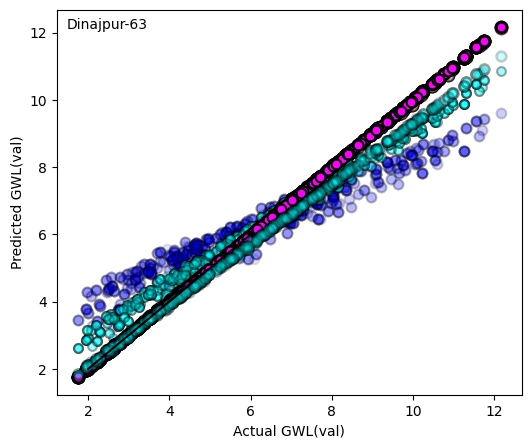

In [63]:
# Create a scatter plot
plt.figure(figsize=(6, 5))

plt.scatter(y_val, hybrid1_pred_val, color='red', edgecolors='black', s=40, linewidths=1.5, label='Hybrid Model 1')
plt.scatter(y_val, hybrid2_pred_val, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.2, label='Hybrid Model 2')
plt.scatter(y_val, hybrid3_pred_val, color='blue', edgecolors='black', s=50, linewidths=1.5,alpha=0.1, label='Hybrid Model 3')
plt.scatter(y_val, hybrid4_pred_val, color='orange', edgecolors='black', s=70, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_val,  hybrid5_pred_val, color='purple', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_val, hybrid6_pred_val, color='pink', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')
plt.scatter(y_val,  hybrid7_pred_val, color='purple', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 7')
plt.scatter(y_val, hybrid8_pred_val, color='cyan', edgecolors='black', s=40, linewidths=1.5,alpha=0.2, label='Hybrid Model 8')
plt.scatter(y_val, hybrid9_pred_val, color='#FF00FF', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 9')
plt.scatter(y_val, hybrid10_pred_val, color='#00FFFF', edgecolors='black', s=50, linewidths=2,alpha=0.1 ,label='Hybrid Model 10')

plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(val)')
plt.ylabel('Predicted GWL(val)')
plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.grid(False)

plt.show()

## Scatter plot: Test: Actual vs. Predicted

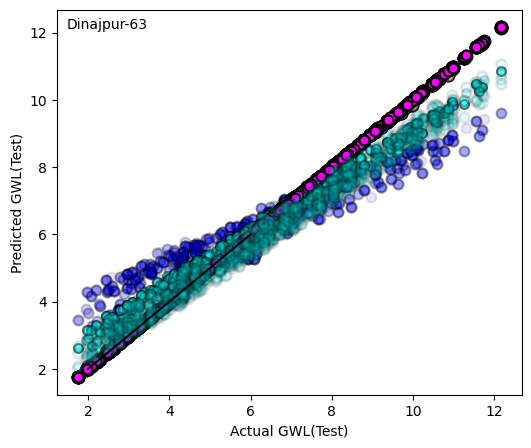

In [64]:
# Create a scatter plot
plt.figure(figsize=(6, 5))

plt.scatter(y_test, hybrid1_pred_test, color='red', edgecolors='black', s=40, linewidths=1.5, label='Hybrid Model 1')
plt.scatter(y_test, hybrid2_pred_test, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.2, label='Hybrid Model 2')
plt.scatter(y_test, hybrid3_pred_test, color='blue', edgecolors='black', s=50, linewidths=1.5,alpha=0.1, label='Hybrid Model 3')
plt.scatter(y_test, hybrid4_pred_test, color='orange', edgecolors='black', s=70, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_test,  hybrid5_pred_test, color='purple', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_test, hybrid6_pred_test, color='pink', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')
plt.scatter(y_test,  hybrid7_pred_test, color='purple', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 7')
plt.scatter(y_test, hybrid8_pred_test, color='cyan', edgecolors='black', s=40, linewidths=1.5,alpha=0.2, label='Hybrid Model 8')
plt.scatter(y_test, hybrid9_pred_test, color='#FF00FF', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 9')
plt.scatter(y_test, hybrid10_pred_test, color='#00FFFF', edgecolors='black', s=50, linewidths=2,alpha=0.1 ,label='Hybrid Model 10')

plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(Test)')
plt.ylabel('Predicted GWL(Test)')
plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.grid(False)
plt.show()

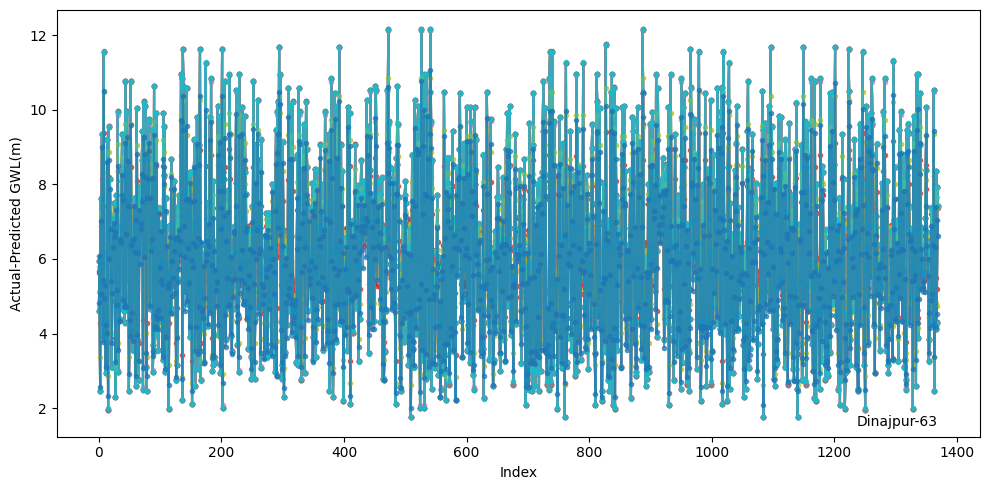

In [65]:
# Define the models and their corresponding predictions
models_predictions = {
    'Hybrid Model 1': hybrid1_pred_test,
    'Hybrid Model 2': hybrid2_pred_test,
    'Hybrid Model 3': hybrid3_pred_test,
    'Hybrid Model 4': hybrid4_pred_test,
    'Hybrid Model 5': hybrid5_pred_test,
    'Hybrid Model 6': hybrid6_pred_test,
    'Hybrid Model 7': hybrid7_pred_test,
    'Hybrid Model 8': hybrid8_pred_test,
    'Hybrid Model 9': hybrid9_pred_test,
    'Hybrid Model 10': hybrid10_pred_test
}

# Create a DataFrame for the actual values (y_test)
actual_values = pd.DataFrame({'Actual Values': y_test.values})

# Create a plot with adjusted figure size and margins
plt.figure(figsize=(10, 5))

# Plot the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=3)

# Plot the predicted values for each model
for model_name, predictions in models_predictions.items():
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=3, alpha=0.7)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')

# Add text "Dinajpur-63" at the bottom right corner with slight adjustment upwards
plt.text(actual_values.index.max(), plt.ylim()[0] + 0.2, "Dinajpur-63", va='bottom', ha='right', fontsize=10)

plt.grid(False)

# Manually adjust the margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.tight_layout()
plt.show()


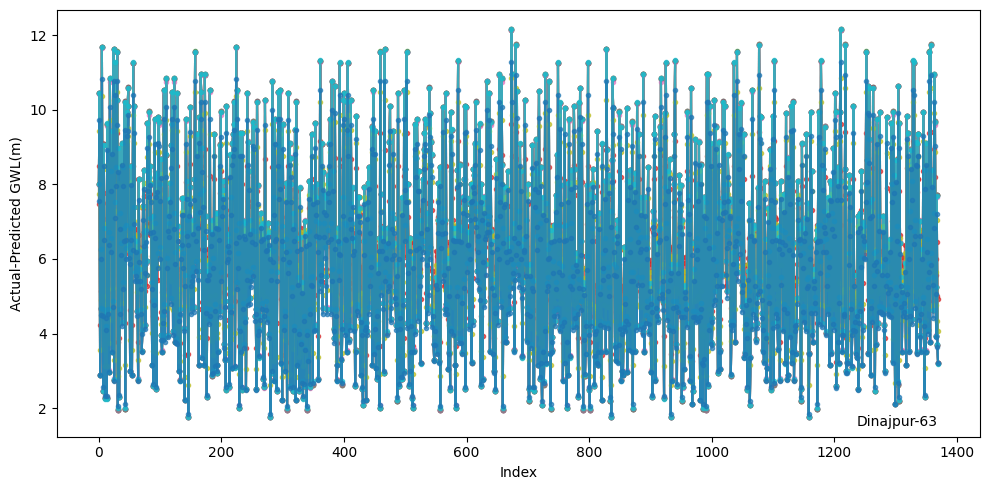

In [66]:
# Define the models and their corresponding predictions
models_predictions_val = {
    'Hybrid Model 1': hybrid1_pred_val,
    'Hybrid Model 2': hybrid2_pred_val,
    'Hybrid Model 3': hybrid3_pred_val,
    'Hybrid Model 4': hybrid4_pred_val,
    'Hybrid Model 5': hybrid5_pred_val,
    'Hybrid Model 6': hybrid6_pred_val,
    'Hybrid Model 7': hybrid7_pred_val,
    'Hybrid Model 8': hybrid8_pred_val,
    'Hybrid Model 9': hybrid9_pred_val,
    'Hybrid Model 10': hybrid10_pred_val
}

# Create a DataFrame for the actual values (y_val)
actual_values = pd.DataFrame({'Actual Values': y_val.values})

# Create a plot
plt.figure(figsize=(10, 5))

# Plot the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=3)

# Plot the predicted values for each model
for model_name, predictions in models_predictions_val.items():
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=3, alpha=0.7)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(actual_values.index.max(), plt.ylim()[0] + 0.2, "Dinajpur-63", va='bottom', ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Validation stage: Distribution and Time series analysis

In [67]:
# Assuming 'Date' is a column in your original DataFrame 'df'
dates_val = df.loc[y_val.index, 'Date']

# Assuming 'hybrid1_pred_val' to 'hybrid10_pred_val' are your predicted values for 10 models
hybrid_val_data = {'Actual Values': y_val.values,
                    'Hybrid Model 1 Predictions': hybrid1_pred_val,
                    'Hybrid Model 2 Predictions': hybrid2_pred_val,
                    'Hybrid Model 3 Predictions': hybrid3_pred_val,
                    'Hybrid Model 4 Predictions': hybrid4_pred_val,
                    'Hybrid Model 5 Predictions': hybrid5_pred_val,
                    'Hybrid Model 6 Predictions': hybrid6_pred_val,
                    'Hybrid Model 7 Predictions': hybrid7_pred_val,
                    'Hybrid Model 8 Predictions': hybrid8_pred_val,
                    'Hybrid Model 9 Predictions': hybrid9_pred_val,
                    'Hybrid Model 10 Predictions': hybrid10_pred_val,
                    'Date': dates_val}

hybrid_val_df = pd.DataFrame(hybrid_val_data)

print("\nValidation Set:")
hybrid_val_df


Validation Set:


,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
7609,8.022000,8.022000,8.017627,7.484841,8.019376,8.019509,7.996789,8.022000,7.732644,8.022321,7.561447,2013-11-01
4084,10.455000,10.455000,10.450961,8.483766,10.452577,10.452758,10.423597,10.455000,9.444149,10.462591,9.728898,2004-03-08
7920,2.890000,2.890000,2.887681,4.233745,2.888609,2.888595,2.876212,2.890000,3.550478,2.887629,2.876736,2014-09-08
8327,6.253333,6.253333,6.257458,6.779219,6.255808,6.255836,6.253822,6.253333,6.518519,6.258312,5.993742,2015-10-20
2716,4.672500,4.672500,4.663267,5.151467,4.666960,4.666970,4.665049,4.672500,4.902248,4.675476,4.484132,2000-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...
5762,5.252000,5.252000,5.254899,5.997026,5.253739,5.254165,5.286178,5.252000,5.651770,5.245386,5.069808,2008-10-11
3254,3.942500,3.942500,3.943528,5.558701,3.943117,3.942833,3.955219,3.942500,4.760389,3.941775,3.909128,2001-11-29
4541,7.712500,7.712500,7.707250,6.446145,7.709350,7.709189,7.673778,7.712500,7.047798,7.700541,7.193468,2005-06-08
350,3.690000,3.690000,3.692582,4.995011,3.691549,3.691555,3.696705,3.690000,4.348701,3.709635,3.637420,1993-12-17


In [68]:
# Convert the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Print the sorted DataFrame
hybrid_val_df

,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
0,3.162,3.162,3.161771,4.650302,3.161863,3.162167,3.153255,3.162,3.899717,3.164879,3.151635,1993-01-09
1,3.162,3.162,3.161771,4.650302,3.161863,3.162167,3.153255,3.162,3.899717,3.164879,3.151635,1993-01-15
2,3.162,3.162,3.161771,4.650302,3.161863,3.162167,3.153255,3.162,3.899717,3.164879,3.151635,1993-01-18
3,3.162,3.162,3.161771,4.650302,3.161863,3.162167,3.153255,3.162,3.899717,3.164879,3.151635,1993-01-20
4,3.162,3.162,3.161771,4.650302,3.161863,3.162167,3.153255,3.162,3.899717,3.164879,3.151635,1993-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...
1365,3.298,3.298,3.305574,5.049862,3.302544,3.302313,3.333525,3.298,4.203809,3.296830,3.315429,2017-11-10
1366,4.800,4.800,4.801845,5.656946,4.801107,4.801146,4.802429,4.800,5.231154,4.800946,4.646491,2017-12-17
1367,4.800,4.800,4.801845,5.656946,4.801107,4.801146,4.802429,4.800,5.231154,4.800946,4.646491,2017-12-21
1368,4.800,4.800,4.801845,5.656946,4.801107,4.801146,4.802429,4.800,5.231154,4.800946,4.646491,2017-12-23


# Violin Plot: Distribution of Predicted vs Actual Values (Test Stage)

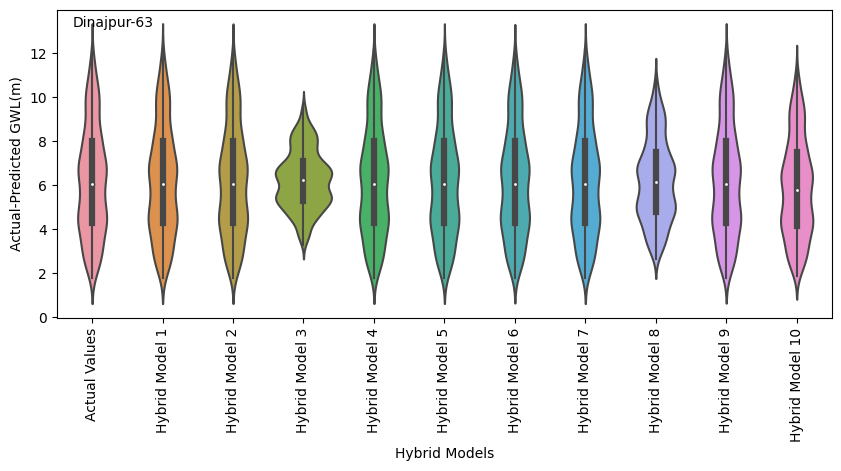

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hybrid1_pred_val' to 'hybrid10_pred_val' are your predicted values for 10 models

# Combine the predicted values into a single DataFrame
predictions_df = pd.DataFrame({
    'Actual Values': y_val.values,
    'Hybrid Model 1': hybrid1_pred_val,
    'Hybrid Model 2': hybrid2_pred_val,
    'Hybrid Model 3': hybrid3_pred_val,
    'Hybrid Model 4': hybrid4_pred_val,
    'Hybrid Model 5': hybrid5_pred_val,
    'Hybrid Model 6': hybrid6_pred_val,
    'Hybrid Model 7': hybrid7_pred_val,
    'Hybrid Model 8': hybrid8_pred_val,
    'Hybrid Model 9': hybrid9_pred_val,
    'Hybrid Model 10': hybrid10_pred_val,
})

# Create a violin plot
plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)
plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.xlabel('Hybrid Models')
plt.ylabel('Actual-Predicted GWL(m)')
# Rotate x-axis ticks by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [70]:
# Print the sorted DataFrame
hybrid_val_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,3.162,3.162,3.162,3.162,3.162,3.223333,3.223333,3.223333,3.223333,3.223333,...,5.5,5.5,5.5,3.298,3.298,3.298,4.8,4.8,4.8,4.8
Hybrid Model 1 Predictions,3.162,3.162,3.162,3.162,3.162,3.223333,3.223333,3.223333,3.223333,3.223333,...,5.5,5.5,5.5,3.298,3.298,3.298,4.8,4.8,4.8,4.8
Hybrid Model 2 Predictions,3.161771,3.161771,3.161771,3.161771,3.161771,3.222302,3.222302,3.222302,3.222302,3.222302,...,5.493746,5.493746,5.493746,3.305574,3.305574,3.305574,4.801845,4.801845,4.801845,4.801845
Hybrid Model 3 Predictions,4.650302,4.650302,4.650302,4.650302,4.650302,4.73043,4.73043,4.73043,4.73043,4.73043,...,6.2075,6.2075,6.2075,5.049862,5.049862,5.049862,5.656946,5.656946,5.656946,5.656946
Hybrid Model 4 Predictions,3.161863,3.161863,3.161863,3.161863,3.161863,3.222714,3.222714,3.222714,3.222714,3.222714,...,5.496248,5.496248,5.496248,3.302544,3.302544,3.302544,4.801107,4.801107,4.801107,4.801107
Hybrid Model 5 Predictions,3.162167,3.162167,3.162167,3.162167,3.162167,3.22218,3.22218,3.22218,3.22218,3.22218,...,5.495918,5.495918,5.495918,3.302313,3.302313,3.302313,4.801146,4.801146,4.801146,4.801146
Hybrid Model 6 Predictions,3.153255,3.153255,3.153255,3.153255,3.153255,3.235891,3.235891,3.235891,3.235891,3.235891,...,5.497048,5.497048,5.497048,3.333525,3.333525,3.333525,4.802429,4.802429,4.802429,4.802429
Hybrid Model 7 Predictions,3.162,3.162,3.162,3.162,3.162,3.223333,3.223333,3.223333,3.223333,3.223333,...,5.5,5.5,5.5,3.298,3.298,3.298,4.8,4.8,4.8,4.8
Hybrid Model 8 Predictions,3.899717,3.899717,3.899717,3.899717,3.899717,3.985434,3.985434,3.985434,3.985434,3.985434,...,5.848474,5.848474,5.848474,4.203809,4.203809,4.203809,5.231154,5.231154,5.231154,5.231154
Hybrid Model 9 Predictions,3.164879,3.164879,3.164879,3.164879,3.164879,3.232599,3.232599,3.232599,3.232599,3.232599,...,5.512535,5.512535,5.512535,3.29683,3.29683,3.29683,4.800946,4.800946,4.800946,4.800946


# Time series plots: Test stage

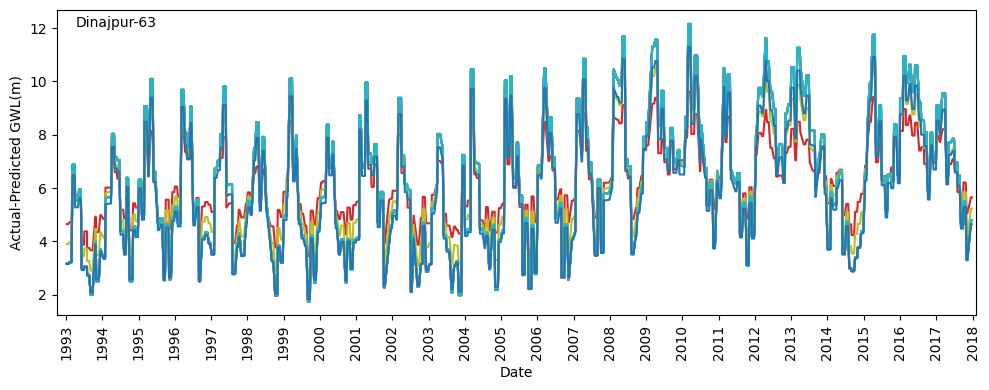

In [71]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Create a time series plot
plt.figure(figsize=(10, 4))

# Iterate over the hybrid models and plot their predictions
for col in hybrid_val_df.columns[:-1]:
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set the date tick frequency to display every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Set the x-axis limits to show data only from 1992 to 2018
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))


plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
# Display the plot
plt.tight_layout()
plt.show()


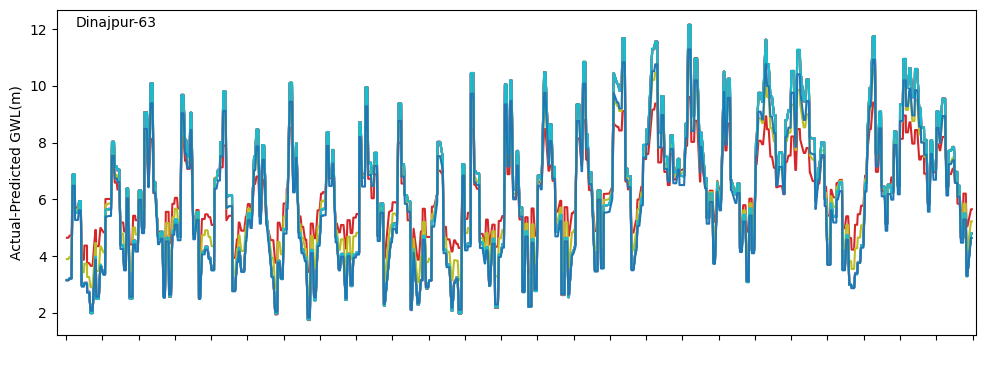

In [72]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Create a time series plot
plt.figure(figsize=(10, 4))

# Iterate over the hybrid models and plot their predictions
for col in hybrid_val_df.columns[:-1]:
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col)

# Add labels and title

plt.ylabel('Actual-Predicted GWL(m)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, color='white')  # Set xticks color to white

# Set the date tick frequency to display every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Set the x-axis limits to show data only from 1992 to 2018
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))


plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
# Display the plot
plt.tight_layout()
plt.show()


# Test stage: Distribution and Time series analysis

In [73]:
# Assuming 'Date' is a column in your original DataFrame 'df'
dates_test = df.loc[y_test.index, 'Date']

# Assuming 'hybrid1_pred_test' to 'hybrid10_pred_test' are your predicted values for 10 models
hybrid_test_data = {'Actual Values': y_test.values,
                    'Hybrid Model 1 Predictions': hybrid1_pred_test,
                    'Hybrid Model 2 Predictions': hybrid2_pred_test,
                    'Hybrid Model 3 Predictions': hybrid3_pred_test,
                    'Hybrid Model 4 Predictions': hybrid4_pred_test,
                    'Hybrid Model 5 Predictions': hybrid5_pred_test,
                    'Hybrid Model 6 Predictions': hybrid6_pred_test,
                    'Hybrid Model 7 Predictions': hybrid7_pred_test,
                    'Hybrid Model 8 Predictions': hybrid8_pred_test,
                    'Hybrid Model 9 Predictions': hybrid9_pred_test,
                    'Hybrid Model 10 Predictions': hybrid10_pred_test,
                    'Date': dates_test}

hybrid_test_df = pd.DataFrame(hybrid_test_data)

print("\nTest Set:")
hybrid_test_df


Test Set:


,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
4710,4.604000,4.604000,4.598489,5.684141,4.600693,4.599949,4.577460,4.604000,5.121128,4.605179,4.817803,2005-11-24
131,5.946000,5.946000,5.944962,5.636838,5.945377,5.945685,5.941581,5.946000,5.787868,5.944905,6.067651,1993-05-12
2802,2.460000,2.460000,2.459212,4.272842,2.459527,2.458390,2.458936,2.460000,3.364416,2.459558,2.561136,2000-09-03
4472,7.622000,7.622000,7.620162,6.892117,7.620897,7.620914,7.617580,7.622000,7.252929,7.629997,7.030225,2005-03-31
1108,5.303333,5.303333,5.298224,6.059377,5.300267,5.300323,5.299189,5.303333,5.675989,5.302745,5.049080,1996-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...
2948,4.124000,4.124000,4.126565,5.488520,4.125539,4.124975,4.153161,4.124000,4.828862,4.140640,4.172290,2001-01-27
6394,8.360000,8.360000,8.362638,7.407543,8.361583,8.361823,8.361869,8.360000,7.886541,8.360056,7.405696,2010-07-05
1746,4.295000,4.295000,4.298968,5.188208,4.297381,4.297808,4.289076,4.295000,4.739267,4.293831,4.510852,1997-10-13
5820,7.922500,7.922500,7.920521,7.423383,7.921313,7.921111,7.910327,7.922500,7.662770,7.920079,7.050998,2008-12-08


In [74]:
# Convert the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)
hybrid_test_df

,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
0,3.162,3.162,3.161771,4.650302,3.161863,3.162167,3.153255,3.162,3.899717,3.164879,3.385435,1993-01-01
1,3.162,3.162,3.161771,4.650302,3.161863,3.162167,3.153255,3.162,3.899717,3.164879,3.057035,1993-01-04
2,3.162,3.162,3.161771,4.650302,3.161863,3.162167,3.153255,3.162,3.899717,3.164879,3.437435,1993-01-13
3,3.162,3.162,3.161771,4.650302,3.161863,3.162167,3.153255,3.162,3.899717,3.164879,3.300035,1993-01-27
4,3.162,3.162,3.161771,4.650302,3.161863,3.162167,3.153255,3.162,3.899717,3.164879,3.421435,1993-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...
1365,3.298,3.298,3.305574,5.049862,3.302544,3.302313,3.333525,3.298,4.203809,3.296830,3.415129,2017-11-30
1366,4.800,4.800,4.801845,5.656946,4.801107,4.801146,4.802429,4.800,5.231154,4.800946,4.871741,2017-12-07
1367,4.800,4.800,4.801845,5.656946,4.801107,4.801146,4.802429,4.800,5.231154,4.800946,4.598991,2017-12-10
1368,4.800,4.800,4.801845,5.656946,4.801107,4.801146,4.802429,4.800,5.231154,4.800946,4.377291,2017-12-28


# Violin Plot: Distribution of Predicted vs Actual Values (Test Stage)

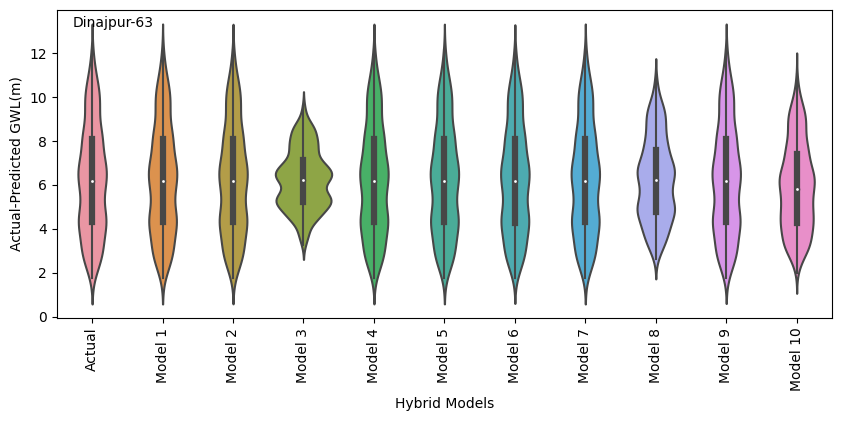

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hybrid1_pred_test' to 'hybrid10_pred_test' are your predicted values for 10 models

# Combine the predicted values into a single DataFrame
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Model 1': hybrid1_pred_test,
    'Model 2': hybrid2_pred_test,
    'Model 3': hybrid3_pred_test,
    'Model 4': hybrid4_pred_test,
    'Model 5': hybrid5_pred_test,
    'Model 6': hybrid6_pred_test,
    'Model 7': hybrid7_pred_test,
    'Model 8': hybrid8_pred_test,
    'Model 9': hybrid9_pred_test,
    'Model 10': hybrid10_pred_test,
})

# Create a violin plot
plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)
plt.xlabel('Hybrid Models')
plt.ylabel('Actual-Predicted GWL(m)')
plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
# Rotate x-axis ticks by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [76]:
# Convert the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# Print the sorted DataFrame
hybrid_test_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,3.162,3.162,3.162,3.162,3.162,3.223333,3.223333,3.223333,3.223333,3.223333,...,3.298,3.298,3.298,3.298,3.298,3.298,4.8,4.8,4.8,4.8
Hybrid Model 1 Predictions,3.162,3.162,3.162,3.162,3.162,3.223333,3.223333,3.223333,3.223333,3.223333,...,3.298,3.298,3.298,3.298,3.298,3.298,4.8,4.8,4.8,4.8
Hybrid Model 2 Predictions,3.161771,3.161771,3.161771,3.161771,3.161771,3.222302,3.222302,3.222302,3.222302,3.222302,...,3.305574,3.305574,3.305574,3.305574,3.305574,3.305574,4.801845,4.801845,4.801845,4.801845
Hybrid Model 3 Predictions,4.650302,4.650302,4.650302,4.650302,4.650302,4.73043,4.73043,4.73043,4.73043,4.73043,...,5.049862,5.049862,5.049862,5.049862,5.049862,5.049862,5.656946,5.656946,5.656946,5.656946
Hybrid Model 4 Predictions,3.161863,3.161863,3.161863,3.161863,3.161863,3.222714,3.222714,3.222714,3.222714,3.222714,...,3.302544,3.302544,3.302544,3.302544,3.302544,3.302544,4.801107,4.801107,4.801107,4.801107
Hybrid Model 5 Predictions,3.162167,3.162167,3.162167,3.162167,3.162167,3.22218,3.22218,3.22218,3.22218,3.22218,...,3.302313,3.302313,3.302313,3.302313,3.302313,3.302313,4.801146,4.801146,4.801146,4.801146
Hybrid Model 6 Predictions,3.153255,3.153255,3.153255,3.153255,3.153255,3.235891,3.235891,3.235891,3.235891,3.235891,...,3.333525,3.333525,3.333525,3.333525,3.333525,3.333525,4.802429,4.802429,4.802429,4.802429
Hybrid Model 7 Predictions,3.162,3.162,3.162,3.162,3.162,3.223333,3.223333,3.223333,3.223333,3.223333,...,3.298,3.298,3.298,3.298,3.298,3.298,4.8,4.8,4.8,4.8
Hybrid Model 8 Predictions,3.899717,3.899717,3.899717,3.899717,3.899717,3.985434,3.985434,3.985434,3.985434,3.985434,...,4.203809,4.203809,4.203809,4.203809,4.203809,4.203809,5.231154,5.231154,5.231154,5.231154
Hybrid Model 9 Predictions,3.164879,3.164879,3.164879,3.164879,3.164879,3.232599,3.232599,3.232599,3.232599,3.232599,...,3.29683,3.29683,3.29683,3.29683,3.29683,3.29683,4.800946,4.800946,4.800946,4.800946


# Time series plots: Test stage

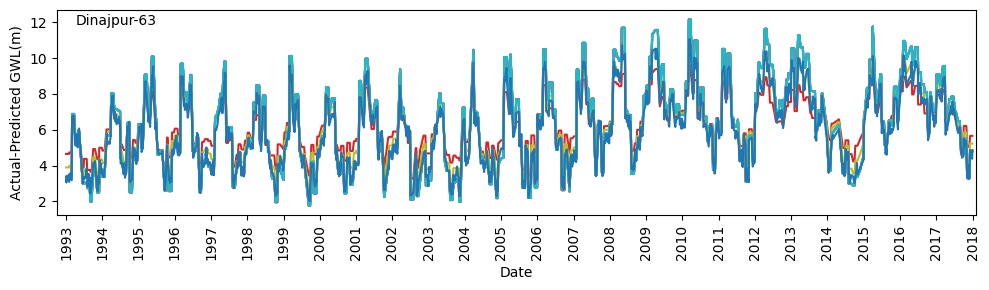

In [77]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# Create a time series plot
plt.figure(figsize=(10, 3))


# Iterate over the hybrid models and plot their predictions
for col in hybrid_test_df.columns[:-1]:
    plt.plot(hybrid_test_df['Date'], hybrid_test_df[col], label=col)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')


# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set the date tick frequency to display every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Set the x-axis limits to show data only from 1992 to 2018
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))

plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
# Display the plot
plt.tight_layout()
plt.show()

# Density Plot: Validation stage

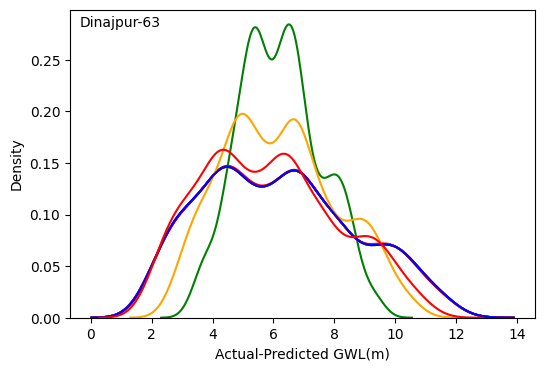

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a figure
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(hybrid1_pred_val, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_val, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_val, color='green', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_val, color='purple', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_val, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_val, color='red', label='Hybrid Model 6')
sns.kdeplot(hybrid7_pred_val, color='purple', label='Hybrid Model 7')
sns.kdeplot(hybrid8_pred_val, color='orange', label='Hybrid Model 8')
sns.kdeplot(hybrid9_pred_val, color='blue', label='Hybrid Model 9')
sns.kdeplot(hybrid10_pred_val, color='red', label='Hybrid Model 10')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()

# Density Plot: Test stage

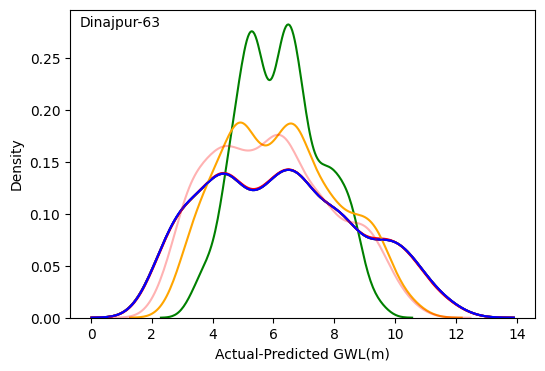

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a figure
plt.figure(figsize=(6, 4))

# Define a list of colors for the density plots
colors = ['green', 'blue', 'green', 'purple', 'orange', 'red', 'purple', 'orange', 'blue', "red"]

# Plotting density plots for each hybrid model with different colors
sns.kdeplot(hybrid1_pred_test, color=colors[0], label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_test, color=colors[1], alpha=0.3, label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_test, color=colors[2], label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_test, color=colors[3], label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_test, color=colors[4], label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_test, color=colors[5], label='Hybrid Model 6')
sns.kdeplot(hybrid7_pred_test, color=colors[6], label='Hybrid Model 7')
sns.kdeplot(hybrid8_pred_test, color=colors[7],label='Hybrid Model 8')
sns.kdeplot(hybrid9_pred_test, color=colors[8], label='Hybrid Model 9')
sns.kdeplot(hybrid10_pred_test, color=colors[9], alpha=0.3,label='Hybrid Model 10')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98, "Dinajpur-63", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()